<h1 style="text-align:center"> Text Message Topics in the <br>National University of Singapore SMS Corpus Data Set </h1>
<h2 style="text-align:center"> A Codecademy Pro Portfolio Project </h2> <br>
This project serves two primary purposes. The first and most immediate purpose is to fulfill the requirements of the Codecademy Pro skill path "Apply Natural Language Processing with Python." The second, and ultimately more important purpose, is to practice my natural language processing skills. As a physicist, the idea of converting words into numbers via a bag of words and/or word embeddings model is fascinating, and then to be able to use those quantitative models for sentiment analysis, categorical prediction, and other applications is quite exciting. The Codecademy skill path covers only the basics of natural language processing, and it is important to have a solid understanding of the basics before moving on to more complicated applications; still, the idea of delving deeper into using more complicated algorithms for natural language processing is intriguing, and I want to get a better sense of how my quantitative skills can be applied to the computer-based processing of human language. <br><br>
The data set used in this project was provided by Codecademy; it is the National University of Singapore SMS Corpus data set, made publicly available by The National University of Singapore. It was compiled by Tao Chen and Min-Yen Kan, as detailed in the following publication: <br>Tao Chen and Min-Yen Kan (2013). Creating a Live, Public Short Message Service Corpus: The NUS SMS Corpus. Language Resources and Evaluation, 47(2)(2013), pages 299-355. <a href = https://link.springer.com/article/10.1007%2Fs10579-012-9197-9> Paper URL </a> <br>I chose to use the National University of Singapore SMS Corpus data set rather than one of the other options that Codecademy provided because it posed two main challenges. The first and most intriguing challenge to me was the informal nature of the corpus: word abbreviations, sometimes to the point of single letters, as well as the use of numbers and/or symbols in place of letters are ubiquitous in text messages, and I wanted the challenge of working with "messy" data to see if I could determine common text message topics in the face of non-standard language usage. The second challenge was dealing with a mix of English and non-English words. I know that English is a very commonly spoken language in Singapore, and I am a native English speaker myself, but I know that many Singaporeans also know Malay, Tamil, and/or Mandarin Chinese; it is reasonable to expect that when sending text messages, a mix of these languages—perhaps even within a single sentence—might be used, and I wanted to see if I could still make broad sense of the corpus with these non-English words present. The above two challenges are no doubt common in the world of natural language processing, so I might as well learn to be comfortable navigating them as early as possible. <br><br>
My central questions regarding the National University of Singapore SMS Corpus data set are the following:<br>
<ol>
    <li> Text message senders from which countries send the longest messages? </li>
    <li> What are some of the most common topics of text messages sent by people from Singapore, India, and the United States? How are they similar, and how are they different?</li>
    <li> How (if at all) did the common topics of text messages sent by people from Singapore change between 2003 and 2011?</li>
    <li> Is it possible to use text message data to predict what country a sender is from?</li>
</ol>
The rest of this notebook aims to answer these three questions using such tools as word counts, TF-IDF analysis, word embeddings, n-gram identification, and a Multinomial Naive Bayes supervised machine learning model. It is broken down into the following sections:<br>
<ul>
    <li> <a href='#Section1'> Importing Needed Software Libraries</a> </li>
    <li> <a href='#Section2'> Reading in the Data and Cleaning It </a> </li>
    <li> <a href='#Section3'> Exploratory Data Analysis </a> </li>
    <li> <a href='#Section4'> Text Pre-Processing </a> </li>
    <li> <a href='#Section5'> Average Text Lengths Per Country </a> </li>
    <li> <a href='#Section6'> Important Words in Messages: TF and TF-IDF Analysis </a> </li>
    <li> <a href='#Section7'> Important Words in Messages: TF and TF-IDF Analysis Comparing and Contrasting Texts from Singapore Eight Years Apart </a> </li>
    <li> <a href='#Section8'> Word Embedding Analysis Based on TF-IDF Analysis </a> </li>
    <li> <a href='#Section9'> The Most Common Two-, Three-, and Four-Word Groups of Words </a> </li>
    <li> <a href='#Section10'> Using Message Text to Predict Country of Origin </a> </li>
    <li> <a href='#Section11'> Conclusions </a> </li>
    <li> <a href='#Section12'> What I Would Do Differently </a> </li>
</ul>


***
<a id="Section1"></a> 

<h3 style="text-align:center"> Importing Needed Software Libraries </h3> <br>
Several software libraries will be used to clean the data, normalize it, visualize it, and conduct TF-IDF analysis, word embedding analysis, and n-gram identification. The scikit-learn library will be used to form a Multinomial Naive Bayes supervised machine learning model of the data.

In [1]:
# Import Pandas (to organize and clean the data):
import pandas as pd

In [2]:
# Import visualization libraries (to visualize the data):
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Import regex operations library (to normalize the data):
import re

# Import machine learning library for word embedding (to analyze the data):
import gensim
from gensim.models import Phrases

# Import Counter class of collection containers library (to analyze the data):
from collections import Counter

# Import classes and methods for text tokenizing, lemmatization, stopwords removal, and n-gram evaluation:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Import classes and methods for bag-of-words model building, TF-IDF text analysis, and Multinomial Naive Bayes 
# model building:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Import model performance-measuring methods:
from sklearn.metrics import accuracy_score, classification_report

c:\users\mcale\appdata\local\programs\python\python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


(I installed Levenhstein as indicated in the warning message above, but yet the warning message still appears. I do not know why this is.)

***
<a id="Section2"></a> 

<h3 style="text-align:center"> Reading in the Data and Cleaning It </h3> <br>
The data set must be read into Python before any analysis can be done. I will read it into a Pandas DataFrame, because this data organization structure is easy to work with and very flexible in terms of the data structures it permits.

In [4]:
# Read the .csv data file into a Pandas DataFrame:
sms_text_data = pd.read_csv('clean_nus_sms.csv')

# Print out basic DataFrame information:
print(sms_text_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48598 entries, 0 to 48597
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48598 non-null  int64 
 1   id          48598 non-null  int64 
 2   Message     48595 non-null  object
 3   length      48598 non-null  object
 4   country     48598 non-null  object
 5   Date        48598 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.2+ MB
None


Codecademy provided the following schema for the data set:
<table>
   <th>Feature</th>
   <th style="text-align:left"> 
       Description</th>
   <tr>
     <td>id</td>
     <td style="text-align:left"> Unique identifier for each message.</td>
    </tr>
    <tr>
      <td>Message</td>
      <td style="text-align:left"> The message contents.</td>
    </tr>
    <tr>
      <td>length</td>
      <td style="text-align:left"> Total number of characters in the message.</td>
    </tr>
    <tr>
     <td>country</td>
     <td style="text-align:left"> Country the sender is from.</td>
    </tr>
    <tr>
     <td>Date</td>
     <td style="text-align:left"> Month and Year a message was sent, in YYYY/M format.
</td>
   </tr>
</table>
<br>Without even looking at any of the text messages stored in the Message column, it is clear that some initial data cleaning must be done, in particular to eliminate null values and to remove the unneeded column "Unnamed: 0."

In [5]:
# Some of the records have a null value in the Message column. Since my goal is to investigate the contents of the
# text messages themselves, these records are useless. Drop them from the DataFrame:
sms_text_data = sms_text_data.dropna(subset=['Message'])

# The first column appears to be a running index designed to match the index of a row in a Pandas DataFrame. 
# This column is redundant, so I drop it from the DataFrame:
sms_text_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

Some additional cleaning must be done. An initial investigation of the data set reveals that some "text messages" are actually error codes; further, lengths are listed as objects rather than integers, and the Date column can be split into separate year and month columns.

In [6]:
# Four text messages have an error message instead of a length. Conveniently, the Message text of these messages
# is the identical error message. Remove these four messages from the DataFrame:

sms_text_data = sms_text_data[sms_text_data.length != 'Err:511']
sms_text_data = sms_text_data[sms_text_data.length != 'Err:510']
sms_text_data = sms_text_data[sms_text_data.length != 'Err:509']
sms_text_data = sms_text_data[sms_text_data.length != 'Err:508']

# Convert the length column from type object to type integer:
sms_text_data.length = pd.to_numeric(sms_text_data.length)

# Split the Date column into a year column and a month column. Add these to the existing DataFrame.
# Since I will not be doing any calculations with either of these columns, I will keep them as type
# object rather than convert them to type integer.
sms_text_data['year'] = sms_text_data.Date.str[0:4]
sms_text_data['month'] = sms_text_data.Date.str[5:]

# Print out DataFrame information again, to make sure nothing blatantly obvious has gone wrong:
print(sms_text_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48591 entries, 0 to 48597
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       48591 non-null  int64 
 1   Message  48591 non-null  object
 2   length   48591 non-null  int64 
 3   country  48591 non-null  object
 4   Date     48591 non-null  object
 5   year     48591 non-null  object
 6   month    48591 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.0+ MB
None


***
<a id="Section3"></a> 

<h3 style="text-align:center"> Exploratory Data Analysis </h3> <br>
While the data set schema provided by Codecademy gave me a good idea of what each feature represents, there are several things about the data that I would like to know before beginning the project in earnest. These questions are:
<ol>
    <li> What countries are the text message senders from? </li>
    <li> How many messages were sent by senders from each country? </li>
    <li> How many text messages, regardless of sender country, were sent each year? </li>
</ol>
These questions can be answered with some basic exploratory data analysis, so I conduct such analysis here.

<h5> What countries are the text message senders from? </h5>

In [7]:
# What countries are represented in the data?
print(sms_text_data.country.unique())

['SG' 'MY' 'India' 'Pakistan' 'United States' 'Canada' 'unknown' 'Serbia'
 'United Kingdom' 'France' 'Singapore' 'China' 'Malaysia' 'Sri Lanka'
 'Spain' 'Bangladesh' 'Philippines' 'Macedonia' 'Romania' 'Kenya'
 'Slovenia' 'New Zealand' 'Nigeria' 'Ghana' 'Indonesia' 'Nepal' 'Morocco'
 'USA' 'Lebanon' 'india' 'Trinidad and Tobago' 'INDIA' 'srilanka'
 'jamaica' 'Hungary' 'Australia' 'Italia' 'BARBADOS' 'Turkey' 'UK']


Some of the country listings are clearly redundant (e.g., "USA" and "United States"). So, I will rename those country listings so as to ensure that all Messages sent from a particular country get associated with that country. My convention will be to keep the "human readable" version of a country name and convert two-letter country codes and country names in all capital letters or without the first letter capitalized to standard English spelling:

In [8]:
sms_text_data.replace('SG','Singapore', regex = False, inplace = True)
sms_text_data.replace('MY','Malaysia', regex = False, inplace = True)
sms_text_data.replace("srilanka", "Sri Lanka", regex = False, inplace = True)
sms_text_data.replace("UK", "United Kingdom", regex = False, inplace = True)
sms_text_data.replace("USA", "United States", regex = False, inplace = True)
sms_text_data.replace("INDIA", "India", regex = False, inplace = True)
sms_text_data.replace("india", "India", regex = False, inplace = True)
sms_text_data.replace("BARBADOS", "Barbados", regex = False, inplace = True)
sms_text_data.replace("Italia", "Italy", regex = False, inplace = True)
sms_text_data.replace("jamaica", "Jamaica", regex = False, inplace = True)

# Print out the unique values in the country column again, to make sure I didn't miss any unconventional spellings 
# and/or make some other blatantly obvious error:
print(sms_text_data.country.unique())

['Singapore' 'Malaysia' 'India' 'Pakistan' 'United States' 'Canada'
 'unknown' 'Serbia' 'United Kingdom' 'France' 'China' 'Sri Lanka' 'Spain'
 'Bangladesh' 'Philippines' 'Macedonia' 'Romania' 'Kenya' 'Slovenia'
 'New Zealand' 'Nigeria' 'Ghana' 'Indonesia' 'Nepal' 'Morocco' 'Lebanon'
 'Trinidad and Tobago' 'Jamaica' 'Hungary' 'Australia' 'Italy' 'Barbados'
 'Turkey']


<h5> How many messages were sent by senders from each country? </h5>

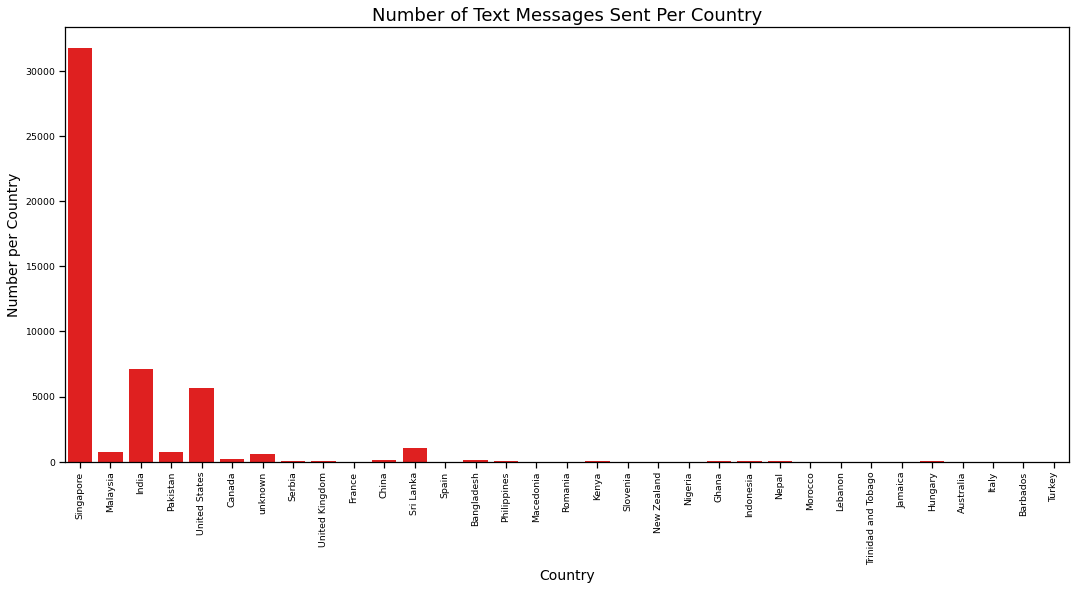

In [9]:
# Make a bar plot of Messages sent per country using Seaborn's countplot() method. I choose to plot the bars in the 
# order in which they appear in the data rather than order them by decreasing counts.

# Set the figure size:
plt.figure(figsize=(18,8))
# Set the context for the notebook (for font scale primarily):
sns.set_context("notebook", font_scale=0.85, rc={"lines.linewidth": 1.5})
# Generate the bar plot, and make each bar the same colour:
sns.countplot(data = sms_text_data, x="country", color = 'red')
# Make the x-axis tick marks easier to read, and make sure the axis labels are informative and readable:
plt.xticks(rotation = 90)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Number per Country", fontsize=14)
plt.title("Number of Text Messages Sent Per Country", fontsize=18)
# Display the plot:
plt.show()

It is clear that the vast majority of messages were sent by people from Singapore. This is unsurprising, given that the data set is mostly comprised of messages from Singaporeans and students attending the National University of Singapore. (Source: Codecademy.) Over 5,000 messages were sent by people from India; over 5,000 messages were sent by people from the United States; and the remaining 30 countries combined to account for the remainder of the text messages. If I wish to investigate common text message topic differences across countries, I should pick countries with the highest number of messages sent, as they will form the largest corpuses to conduct natural language processing analysis. These countries are Singapore, India, and the United States. I will therefore concentrate most of my analysis on these countries.

<h5> How many text messages, regardless of sender country, were sent each year? </h5>

In [10]:
# What years were the text messages sent?
print(sms_text_data.year.unique())

['2003' '2010' '2011' '2012' '2013' '2014' '2015']


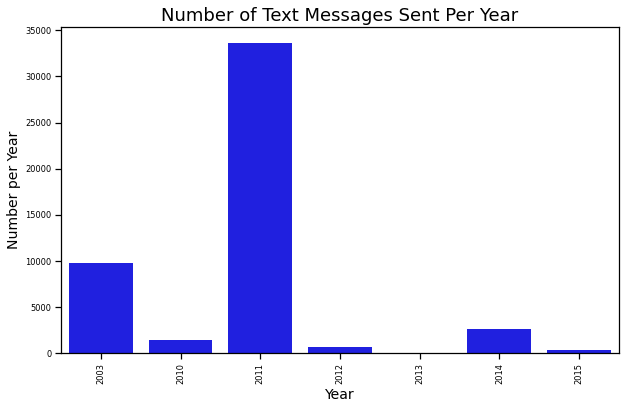

In [11]:
# Make a bar plot of Messages sent per year using Seaborn's countplot() method. I choose to plot the bars in the order
# in which they appear in the data rather than order them by decreasing counts.

# Set the figure size:
plt.figure(figsize=(10,6))
# Set the context for the notebook (for font scale primarily):
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})
# Generate the bar plot, and make each bar the same colour:
sns.countplot(data = sms_text_data, x="year", color = 'blue')
# Make the x-axis labels easier to read, and make sure the axis labels are informative and readable:
plt.xticks(rotation = 90)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number per Year", fontsize=14)
plt.title("Number of Text Messages Sent Per Year", fontsize=18)
# Display the plot:
plt.show()

Well over half of the text messages in the data set were sent in 2011; the year with the next most messages sent was 2003. Upon seeing the results of this plot, I decided that it would be interesting to see how (and if) common text message topics changed in the eight years between 2003 and 2011. I further decided to limit myself to considering messages sent from people from Singapore each of those years; this is because Singapore accounts for about 70% of all text messages in the data set.

***
<a id="Section4"></a> 

<h3 style="text-align:center"> Text Pre-Processing </h3> <br>
Text message data is noisy. It is common for message senders to use numbers in place of letters/words, to use symbols in place of letters/words, to include standard and non-standard punctuation, and to include emoji and other text-based art in the body of their messages. URLs may also be included. Before doing anything else, I must remove some noise from the text messages. For my purposes, this noise removal will include standard punctuation marks, standard keyboard symbols, and the special character ┾. I will also remove the token &lt; DECIMAL &gt;, as it appears a few times in the corpus and it does not appear to convey any linguistical meaning.  I chose not to remove special characters like ü because they could be important to non-English words found in the text messages; I also chose not to remove numbers, because they could be taking the place of letters and/or words in the messages (e.g., 2 instead of "to"). <br>
It is also common to normalize text before engaging in word count, TF-IDF, word embedding, and/or n-gram analysis. For my purposes, text normalization includes converting all characters to lowercase, tokenizing the text messages (i.e., breaking them up into individual words), removing stopwords (i.e., removing common words which are important for sentence structure but not for determining topics or overall sentiment) and lemmatizing the remaining words (i.e., casting words into their root forms). <br>
Noise removal and text normalization are conducted below.

In [12]:
# Define a few noise removal functions to make noise removal on Messages in the DataFrame easier:

# Replace punctuation marks and standard symbols with a single space:
def remove_punctuation(text):
    return re.sub(r',|\.|\:|;|-|/|&|!|\?|\(|\)|\+|@|<|>|#|~|=|\$|\*|[|]|{|}',' ',text)

# Replace apostrophes with a single space:
def replace_apostrophe(text):
    return re.sub(r"'",' ',text)

# Replace the special character ┾ with a single space:
def replace_crossmark(text):
    return re.sub(r"┾",' ',text)

# Implementing some of the above functions may introduce multiple whitespaces ('  ' or '   ', etc.)
# Replace any instances of multiple whitespaces with a single whitespace:
def remove_xtra_whitespace(text):
    return re.sub(r'\s+', ' ', text)

# The following code was written by the curriculum developers at Codecademy in their lesson on word lemmatization. 
# I have not changed any of the original code they wrote. The purpose of the code is to determine which part of 
# speech a word most probably belongs to -- noun, verb, adjective, adverb -- and to return that part of speech.
# The result of that code is in turn handed off to a word lemmatizer, so it "knows" which part of speech a word
# most likely belongs to.
def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len([item for item in probable_part_of_speech if item.pos()=="n"])
    pos_counts["v"] = len([item for item in probable_part_of_speech if item.pos()=="v"])
    pos_counts["a"] = len([item for item in probable_part_of_speech if item.pos()=="a"])
    pos_counts["r"] = len([item for item in probable_part_of_speech if item.pos()=="r"])
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

<h5> Noise Removal </h5>

In [13]:
# Use some of the above functions to remove noise from the Messages, and to begin normalizing them:

# The specific pattern of text <DECIMAL> was observed in a number of text messages. Replace it with a single space:
sms_text_data.Message = sms_text_data.Message.replace('<DECIMAL>', ' ', regex = False)

# Remove apostrophes and punctuation/certain symbols from the Messages:
sms_text_data.Message = sms_text_data.Message.apply(lambda x: replace_apostrophe(x))
sms_text_data.Message = sms_text_data.Message.apply(lambda x: replace_crossmark(x))
sms_text_data.Message = sms_text_data.Message.apply(lambda x: remove_punctuation(x))

# Remove any extra whitespace inadvertantly added to the Messages:
sms_text_data.Message = sms_text_data.Message.apply(lambda x: remove_xtra_whitespace(x))

# Convert all characters to lowercase:
sms_text_data.Message = sms_text_data.Message.apply(lambda x: x.lower())

<h5> Tokenization </h5>

In [14]:
# Break each text message up into individual words using the NLTK method word_tokenize:
sms_text_data['Message_tokenized'] = sms_text_data.Message.apply(lambda text_message: word_tokenize(text_message))

<h5> Stopword Removal </h5>

In [15]:
# Load a set of common English stopwords for stopword removal:
eng_stopwords = set(stopwords.words('english'))

In [16]:
# Remove stopwords from the text Messages.
# In retrospect, this probably would have been easier to do if the tokenized messages were in a list rather than a
# DataFrame column, but that is a lesson that I will carry into my next NLP project.

# Make a new column in the DataFrame which contains, for now, empty lists:
sms_text_data['Message_tokenized_nostop'] = [list() for i in range(len(sms_text_data['Message_tokenized']))]

# Loop over each row of the DataFrame, gather up the tokenized text, and loop through each token to see whether 
# it is a stopword. If it is NOT a stopword, add it to the list in Message_tokenized_nostop for that particular 
# row; otherwise, leave the word out of said list:
# Begin loop:
for i in range(len(sms_text_data['Message_tokenized'])):
    # Pluck off the list of tokens corresponding to this particular row:
    thistext = sms_text_data.Message_tokenized.iloc[i]
    # Loop over tokens in the current list of tokens:
    for word in thistext:
        # If the token in question is not in the list of English stopwords, add it to the list of tokens in
        # Message_tokenized_nostop for this particular row.
        if not word in eng_stopwords:
            sms_text_data.Message_tokenized_nostop.iloc[i].append(word)

# Print out the header for the new column Message_tokenized_nostop to make sure that nothing blatantly obvious has gone
# wrong (with the first 5 records at least):
print(sms_text_data.Message_tokenized_nostop.head())

0                              [bugis, oso, near, wat]
1    [go, jurong, point, crazy, available, bugis, n...
2                    [dunno, lets, go, learn, pilates]
3    [den, weekdays, got, special, price, haiz, can...
4                                    [meet, lunch, la]
Name: Message_tokenized_nostop, dtype: object


It is apparent that many of these messages contain a mix of English and non-English words.

<h5> Word Lemmatization </h5>

In [17]:
# Instantiate an object of the WordNetLemmatizer() class:
lemmatizer = WordNetLemmatizer()

In [18]:
# Lemmatize the remaining words in the text messages.
# In retrospect, this also probably would have been easier to do if the tokenized messages with stopwords removed were
# in a list rather than a DataFrame column, but that is another lesson that I will carry into my next NLP project.

# Make a new column in the DataFrame which contains, for now, empty lists:
sms_text_data['Msg_token_nostop_lemmmed'] = [list() for i in range(len(sms_text_data['Message_tokenized_nostop']))]

# Loop over each row, gather up the tokenized text, go through the tokenized text word by word to lemmatize it (after
# determining which part of speech the word most probably belongs to), and add the lemmatized word to the list in
# Msg_token_nostop_lemmed for that particular row:
# Begin loop:
for i in range(len(sms_text_data['Message_tokenized_nostop'])):
    # Pluck off the list of tokens corresponding to this particular row:
    thistext = sms_text_data.Message_tokenized_nostop.iloc[i]
    # Loop over tokens in the current list of tokens: 
    for word in thistext:
        # Lemmatize the token after first determining its likely part of speech:
        lemmatized = lemmatizer.lemmatize(word, get_part_of_speech(word))
        # Add the lemmatized token to the list of tokens in Msg_token_nostop_lemmed for this particular row:
        sms_text_data.Msg_token_nostop_lemmmed.iloc[i].append(lemmatized)

# Print out the header for the new column Msg_token_nostop_lemmmed to make sure that nothing blatantly obvious has gone
# wrong (with the first 5 records at least):
print(sms_text_data.Msg_token_nostop_lemmmed.head())

0                              [bugis, oso, near, wat]
1    [go, jurong, point, crazy, available, bugis, n...
2                      [dunno, let, go, learn, pilate]
3    [den, weekday, get, special, price, haiz, cant...
4                                    [meet, lunch, la]
Name: Msg_token_nostop_lemmmed, dtype: object


***
<a id="Section5"></a> 

<h3 style="text-align:center"> Average Text Lengths Per Country </h3> <br>
Having cleaned the data, removed noise from the text message data, and normalized the text message data, it is time to begin answering some of my central questions about the data set. I will begin with the first question I posed, because it is arguably the easiest question to answer and is the sort of question I have the most experience answering. That question is, "Text message senders from which countries send the longest messages?" <br>
To answer this question, I will simply calculate the average text message length as broken down by country the sender is from. I will then report the top 5 countries in terms of average message length. I will, however, note from the onset that my answer to the above question will suffer a little bit from small number statistics, as over half of the countries have fewer than 100 text messages to average over and some have fewer than 10.

In [19]:
# Group records by country and calculate the average length of Messages:
avg_text_lengths = sms_text_data.groupby(['country']).length.mean().reset_index()

# Sort the DataFrame by average length of Messages:
avg_text_lengths.sort_values(by=['length'], ascending = False, inplace = True)

# Print out the names of the five countries with the biggest average length of Messages:
print(avg_text_lengths.nlargest(5,'length'))

      country      length
3      Canada  103.782828
27  Sri Lanka   94.493792
14  Macedonia   92.200000
6       Ghana   73.500000
24  Singapore   55.996134


People from Canada sent the longest text messages (of messages in this particular corpus), followed by people from Sri Lanka, Macedonia, Ghana, and Singapore. I caution the reader that the averages from Sri Lanka, Macedonia, and Ghana almost certainly suffer from small number statistics, so the averages calculated here may not be truly representative of the lengths of messages that people from Sri Lanka/Macedonia/Ghana send when in Singapore.

***
<a id="Section6"></a> 

<h3 style="text-align:center"> Important Words in Messages: TF and TF-IDF Analysis </h3> <br>
The next four sections are aimed at answering the following two central questions of this project: "What are some of the most common topics of text messages sent by people from Singapore, India, and the United States? How are they similar, and how are they different?" and "How (if at all) did the common topics of text messages sent by people from Singapore change between 2003 and 2011?" I will be exploring three main avenues of addressing these questions. I will begin by seeing what I can learn by conducting term frequency (TF) and term frequency-inverse document frequency (TF-IDF) analysis on text messages from users from Singapore, India, and the United States. "Term frequency" simply refers to how often a term/word appears in a corpus of documents; it is a count of how often the word appears in the corpus. "Term frequency-inverse document frequency" is a measure of how important a word is to a particular document, given how often it appears in the document and over the corpus of documents. Words which appear in many documents in the corpus are "penalized" in TF-IDF analysis, whereas words that appear infrequently are not; the assumption is that if a word appears in one document but not in other documents in the corpus, it must be of particular importance to that document. The goal of looking at TF and TF-IDF analysis of texts sent by people from Singapore, India, and the United States will be to get a sense of the most common and the most relevant words found in those texts; this should give me some overall sense of what people are most commonly talking about in their text messages.

In [20]:
# Separate out text messages from users from Singapore, India, and the United States into separate DataFrames for
# easier analysis:
sg_sms_text_data = sms_text_data[sms_text_data.country == 'Singapore']
in_sms_text_data = sms_text_data[sms_text_data.country == 'India']
us_sms_text_data = sms_text_data[sms_text_data.country == 'United States']

<h5> Texts from people from Singapore: </h5> 

In [21]:
# Term-Frequency analysis:

# Initialize an empty list:
sg_corpus = []

# Loop over records and, for each record, append each word of the associated message to the list sg_corpus. This
# creates a list of all non-stopword, lemmatized words in all text messages sent by users from Singapore:
# Begin loop:
for i in range(len(sg_sms_text_data['Msg_token_nostop_lemmmed'])):
    # Pluck off the list containing non-stopword, lemmatized words of the Message associated with this record:
    thistext = sg_sms_text_data.Msg_token_nostop_lemmmed.iloc[i]
    # Loop over tokens in the current list:
    for word in thistext:
        # Append the current token to the master list sg_corpus:
        sg_corpus.append(word)

# Instantiate a Counter class object from the iterable list sg_corpus:
sg_count_of_words = Counter(sg_corpus)
# Since objects of the Counter class are a subclass of dictionaries, convert the Counter object sg_count_of_words
# to a Pandas DataFrame:
sg_word_counts = pd.DataFrame.from_dict(sg_count_of_words, orient='index').reset_index()
# Rename the columns of the DataFrame to be more interpretable by humans:
sg_word_counts.rename(columns = {'index': 'word', 0: 'count'}, inplace = True)
# Sort the DataFrame by the count column:
sg_word_counts.sort_values(by=["count"], ascending = False, inplace = True)
# Print out the 15 most commonly used words:
print(sg_word_counts.nlargest(15,'count'))

# I realized after completing the project that simply using the Counter method most_common() would have been faster and
# perhaps more efficient than what I did above. This is another lesson that I will be taking into my next NLP project.

        word  count
129        u   8283
93      haha   6630
4         go   4477
16       get   3097
2518     lol   2818
247       ok   1813
1454  hahaha   1752
263     late   1707
120     time   1631
153     okay   1608
1729      le   1458
100    think   1448
43      come   1371
38      meet   1368
64       one   1264


Among the most common words found in text messages sent by people from Singapore are haha, lol, and hahaha; these could be written in reaction to an event and/or previous text message, or to show that a part of the message being sent is amusing/not that serious. Other commonly found words such as "come," "meet," "late," "go," and "get" indicate that messages often plan meetings, warn the receiver that the sender will be late to a meeting, or ask if the receiver would like to meet up to do something. I would expect such messages to be common in a corpus of text messages. Also appearing in the list of common words is "ok," which I would also expect to commonly see in a corpus of text messages as senders acknowledge the receipt of a previous message or communicate their assent to some question being asked.

In [22]:
# Term Frequency-Inverse Document Frequency analysis:

# Initialize an empty list:
sing_corpus = []

# Loop over records and, for each record, join the list of non-stopword, lemmatized words into one string, then append
# that string to the list of text message strings to be stored in sing_corpus:

# Begin loop:
for i in range(len(sg_sms_text_data.Msg_token_nostop_lemmmed)):
    # Pluck off the list containing non-stopword, lemmatized words of the Message associated with this record:
    thislist = sg_sms_text_data.Msg_token_nostop_lemmmed.iloc[i]
    # Join the tokens in the current list into one string, separating them by commas:
    thisstring = ', '.join(thislist) 
    # Append the current string to the list sing_corpus:
    sing_corpus.append(thisstring)

# Instantiate a TfidVectorizer object, making sure that inverse document frequency will be calculated:
sing_vectorizer = TfidfVectorizer(use_idf=True)
# Fit the sing_vectorizer object to the corpus contained in sing_corpus:
sing_tfidf_vectors = sing_vectorizer.fit_transform(sing_corpus)

The object sing_tfidf_vector is essentially a collection of vectors, with each vector corresponding to one text message and each element of each vector corresponding to a word found in the corpus of text messages from users in Sinagpore. Given that there are over 30,000 individual text messages in the corpus, and that the number of words found in the entire corpus is easily in the tens of thousands, evaluating each vector of the collection of vectors sing_tfidf_vectors individually is  not feasible. Instead, what I will do is loop over vectors, find the non-zero elements of that vector, and append the resulting words to a list. Then, I will count how many times a word appeared in the list of "important" words, and look for the top 15 "important" words. 

In [23]:
# Begin loop:
for i in range(len(sg_sms_text_data.Msg_token_nostop_lemmmed)):
    # Pluck off the tf-idf vector corresponding to the current record, i.e. text message:
    tfidf_vector = sing_tfidf_vectors[i]
    # Place tf-idf values in a Pandas DataFrame, setting the indices of the DataFrame to the words found in the
    # corpus of text messages:
    tfidf_results = pd.DataFrame(tfidf_vector.T.todense(), index = sing_vectorizer.get_feature_names(), \
                                 columns = ["TF-IDF Score"])
    # Keep only those records in tfidf_results which have a non-zero tf-idf score:
    nonzero_words = tfidf_results[tfidf_results['TF-IDF Score'] > 0.0]
    # If this is the first vector, make the DataFrame of non-zero tf-idf words equal to the current DataFrame 
    # nonzero_words:
    if i == 0:
        sing_top_tfidf_scores = nonzero_words
    # Otherwise, append the current DataFrame nonzero_words to the already extant DataFrame sing_top_tfidf_scores:
    else:
        sing_top_tfidf_scores = sing_top_tfidf_scores.append(nonzero_words)

# Convert the DataFrame sing_top_tfidf_words to a list:
sing_top_tfidf_words = sing_top_tfidf_scores.index[sing_top_tfidf_scores['TF-IDF Score'] > 0.0].to_list()

# Instantiate a Counter class from the iterable list sing_top_tfidf_words:
sing_count_of_top_tfidf_words = Counter(sing_top_tfidf_words)
# Convert the Counter object sing_count_of_top_tfidf_words to a Pandas DataFrame:
sing_top_tfidf_word_counts = pd.DataFrame.from_dict(sing_count_of_top_tfidf_words, orient='index').reset_index()
# Rename the columns of the DataFrame to be more interpretable by humans:
sing_top_tfidf_word_counts.rename(columns = {'index': 'word', 0: 'count'}, inplace = True)
# Sort the DataFrame by the count column:
sing_top_tfidf_word_counts.sort_values(by=["count"], ascending = False, inplace = True)
# Print out the 15 most commonly occuring important words in text messages from users from Singapore:
print(sing_top_tfidf_word_counts.nlargest(15,'count'))

        word  count
89      haha   4722
10        go   4036
9        get   2861
2490     lol   2411
238       ok   1745
251     late   1646
116     time   1572
145     okay   1518
1430  hahaha   1432
1705      le   1406
98     think   1379
38      come   1321
36      meet   1306
74       one   1154
214       ur   1133


Many of these "most important" words are also found in the list of most common words, which does not surprise me given the nature of what I did to arrive at the list of "most important" words (basically, a modified TF analysis) and words themselves. It is interesting to note that, of words that appeared in both the TF and TF-IDF "top 15" lists, the order has shifted a bit, perhaps indicating how important overall a word tends to be to text messages as a whole. For the most part, these top 15 "most important" words are those one would expect to be important words in text messages: "late," "time," "come," "meet," "go," "get," "time." These words again give a sense that the messages are setting up meetings, letting the receiver know that a sender will be late for a meeting, or asking the receiver if they would like to go do something. I did find it interesting that the Malay word "le" appears in both the top 15 "most common" words list and the top 15 "most important" words list; Google tells me that "le" is used either to change a verb into a command or to soften a verb's tone in Malay slang. The latter seems like an important idea to convey in a text message (and frankly English could use a similar term).

<h5> Texts from people from India: </h5>

In [24]:
# Term-Frequency analysis:

# Initialize an empty list:
in_corpus = []

# Loop over records and, for each record, append each word of the associated message to the list in_corpus. This
# creates a list of all non-stopword, lemmatized words in all text messages sent by users from India:
# Begin loop:
for i in range(len(in_sms_text_data['Msg_token_nostop_lemmmed'])):
    # Pluck off the list containing non-stopword, lemmatized words of the Message associated with this record:
    thistext = in_sms_text_data.Msg_token_nostop_lemmmed.iloc[i]
    # Loop over tokens in the current list:
    for word in thistext:
        # Append the current token to the master list in_corpus:
        in_corpus.append(word)

# Instantiate a Counter class object from the iterable list in_corpus:
in_count_of_words = Counter(in_corpus)
# Convert the Counter object in_count_of_words to a Pandas DataFrame:
in_word_counts = pd.DataFrame.from_dict(in_count_of_words, orient='index').reset_index()
# Rename the columns of the DataFrame to be more interpretable by humans:
in_word_counts.rename(columns = {'index': 'word', 0: 'count'}, inplace = True)
# Sort the DataFrame by the count column:
in_word_counts.sort_values(by=["count"], ascending = False, inplace = True)
# Print out the 15 most commonly used words
print(in_word_counts.nlargest(15,'count'))

     word  count
48      u   1190
0       k    403
83   come    393
578     2    338
33     ur    323
527  call    323
214   get    302
529    ok    301
297    go    300
194     r    293
45    hey    247
487    ``    239
128     n    238
397   day    237
412  good    232


The above list of the top 15 "most common" words found in texts sent by people from India is markedly different than the list of the top 15 "most common" words found in texts sent by people from Singapore. In fact, the only five words the two lists have in common are "u," "come," "go," "get," and "ok." It is striking to see how many number and single-letter abbreviations for words appear in the top 15 "most common" words found in texts sent by people from India; clearly, these text message senders value brevity in typing. If there are character limits on text messages, this would make a great deal of sense to me; however, I do not know if this is the case. Also, I found the appearance of "call" to be particularly interesting. (I also note that the empty string \`\` appears in the list of most common "words." Given that I have not set any tokens to an empty string, I do not know why it is appearing in the list of most commonly found words.) Given the above top 15 "most common" words list, one could imagine that some of the most commonly sent text messages wish someone a good day, or ask them to call the message sender, in addition to messages which set up meetings or ask if the receiver wants to go do something.

In [25]:
# Term Frequency-Inverse Document Frequency analysis:

# Initialize an empty list:
india_corpus = []

# Loop over records and, for each record, join the list of non-stopword, lemmatized words into one string, then append
# that string to the list of text message strings to be stored in india_corpus:
# Begin loop:
for i in range(len(in_sms_text_data.Msg_token_nostop_lemmmed)):
    # Pluck off the list containing non-stopword, lemmatized words of the Message associated with this record:
    thislist = in_sms_text_data.Msg_token_nostop_lemmmed.iloc[i]
    # Join the tokens in the current list into one string, separating them by commas:
    thisstring = ', '.join(thislist) 
    # Append the current string to the list india_corpus:
    india_corpus.append(thisstring)

# Instantiate a TfidVectorizer object, making sure that inverse document frequency will be calculated:    
india_vectorizer = TfidfVectorizer(use_idf=True)
# Fit the india_vectorizer object to the corpus contained in india_corpus:
india_tfidf_vectors = india_vectorizer.fit_transform(india_corpus)

# Begin loop over vectors:
for i in range(len(in_sms_text_data.Msg_token_nostop_lemmmed)):
    # Pluck off the tf-idf vector corresponding to the current record, i.e. text message:
    tfidf_vector = india_tfidf_vectors[i]
    # Place tf-idf values in a Pandas DataFrame, setting the indices of the DataFrame to the words found in the
    # corpus of text messages:
    tfidf_results = pd.DataFrame(tfidf_vector.T.todense(), index = india_vectorizer.get_feature_names(), \
                                 columns = ["TF-IDF Score"])
    # Keep only those records in tfidf_results which have a non-zero tf-idf score:
    nonzero_words = tfidf_results[tfidf_results['TF-IDF Score'] > 0.0]
    # If this is the first vector, make the DataFrame of non-zero tf-idf words equal to the current DataFrame 
    # nonzero_words:
    if i == 0:
        india_top_tfidf_scores = nonzero_words
    # Otherwise, append the current DataFrame nonzero_words to the already extant DataFrame india_top_tfidf_scores:    
    else:
        india_top_tfidf_scores = india_top_tfidf_scores.append(nonzero_words)

# Convert the DataFrame india_top_tfidf_words to a list:
india_top_tfidf_words = india_top_tfidf_scores.index[india_top_tfidf_scores['TF-IDF Score'] > 0.0].to_list()

# Instantiate a Counter class from the iterable list india_top_tfidf_words:
india_count_of_top_tfidf_words = Counter(india_top_tfidf_words)
# Convert the Counter object india_count_of_top_ifidf_words to a Pandas DataFrame:
india_top_tfidf_word_counts = pd.DataFrame.from_dict(india_count_of_top_tfidf_words, orient='index').reset_index()
# Rename the columns of the DataFrame to be more interpretable by humans:
india_top_tfidf_word_counts.rename(columns = {'index': 'word', 0: 'count'}, inplace = True)
# Sort the DataFrame by the count column:
india_top_tfidf_word_counts.sort_values(by=["count"], ascending = False, inplace = True)
# Print out the 15 most commonly occuring important words in text messages from users from India:
print(india_top_tfidf_word_counts.nlargest(15,'count'))

     word  count
79   come    372
511  call    302
514    ok    289
206   get    286
284    go    283
31     ur    248
44    hey    247
394  good    220
136    da    204
383   day    200
602    hi    184
76   send    170
369  dear    160
46   tell    158
59     na    151


A bit over half or so of the words that were in the top 15 "most common" words list also appear in the top 15 "most important" words list, but all of the single letter/number word abbreviations (and the empty string \`\`) are gone. "Call" is one of the most commonly found "important words" in a text message, which I find to be very interesting. I also find the appearance of "dear," "tell," and "send" to be interesting. My interpretation of this list of words is that common text messages from people from India are asking for the receiver to call them and/or telling the receiver to call someone, to wish a loved one a good day, or to ask the receiver to send someone something. While the appearance of "go," "get," and "come" indicate that a good deal of messages are sent to plan meetings and/or ask if the receiver would like to go do something, a significant number of messages are meant to quickly inform a loved one how one is on a particular day, to let a loved one know that one is thinking of them, or to set up a time to talk on the phone. That is to say, people from India seem to be using text messages more for brief, personal communications, or to carry on conversations, than do people from Singapore.

<h5> Texts from people from the United States: </h5>

In [26]:
# Term-Frequency analysis:

# Initialize an empty list:
us_corpus = []

# Loop over records and, for each record, append each word of the associated message to the list us_corpus. This
# creates a list of all non-stopword, lemmatized words in all texts messages sent by users from the United States:

# Begin loop:
for i in range(len(us_sms_text_data['Msg_token_nostop_lemmmed'])):
    # Pluck off the list containing non-stopword, lemmatized words of the Message associated with this record:
    thistext = us_sms_text_data.Msg_token_nostop_lemmmed.iloc[i]
    # Loop over tokens in the current list:
    for word in thistext:
        # Append the current token to the master list us_corpus:
        us_corpus.append(word)

# Instantiate a Counter class object from the iterable list us_corpus:
us_count_of_words = Counter(us_corpus)
# Convert the Counter object us_count_of_words to a Pandas DataFrame:
us_word_counts = pd.DataFrame.from_dict(us_count_of_words, orient='index').reset_index()
# Rename the columns of the DataFrame to be more interpretable by humans:
us_word_counts.rename(columns = {'index': 'word', 0: 'count'}, inplace = True)
# Sort the DataFrame by the count column:
us_word_counts.sort_values(by=["count"], ascending = False, inplace = True)
# Print out the 15 most commonly used words
print(us_word_counts.nlargest(15,'count'))

       word  count
84      get    602
115    know    340
418       u    336
121      go    315
5       lol    278
54     like    262
68   thanks    256
222    want    252
215    come    232
66     yeah    207
345    time    205
685      hi    201
188   think    192
417     see    189
407    love    182


This list of top 15 "most common" words is more similar in spirit to the list of top 15 "most common" words from people from Singapore than it is to the list of top 15 "most common" words from people from India. "Get," "go," "come," and "time" are all found in the list of top 15 "most common" words from people from the United States; these words indicate that meetings and/or get-togethers are being arranged. Similarly to Singapore's top 15 list, the appearance of "lol" indicates either the softening of a message or a reaction to a previous message or event. "Thanks" indicates acknowledgement of a message, whereas "hi" is a very common greeting. I found the appearance of "think," "love," "know," and "see" to be very interesting. These words, in conjunction with "hi" and "thanks," may be indicating that American text senders are communicating brief messages about their status or carrying on a conversation more than arranging meetings or get-togethers.

In [27]:
# Term Frequency-Inverse Document Frequency analysis:

# Initialize an empty list:
usa_corpus = []

# Loop over records and, for each record, join the list of non-stopword, lemmatized words into one string, then append
# that string to the list of text message strings to be stored in sing_corpus:
# Begin loop:
for i in range(len(us_sms_text_data.Msg_token_nostop_lemmmed)):
    # Pluck off the list containing non-stopword, lemmatized words of the Message associated with this record:
    thislist = us_sms_text_data.Msg_token_nostop_lemmmed.iloc[i]
    # Join the tokens in the current list into one string, separating them by commas:
    thisstring = ', '.join(thislist) 
    # Append the current string to the list usa_corpus:
    usa_corpus.append(thisstring)

# Instantiate a TfidVectorizer object, making sure that inverse document frequency will be calculated:
usa_vectorizer = TfidfVectorizer(use_idf=True)
# Fit the usa_vectorizer object to the corpus contained in usa_corpus:
usa_tfidf_vectors = usa_vectorizer.fit_transform(usa_corpus)

# Begin loop over vectors:
for i in range(len(us_sms_text_data.Msg_token_nostop_lemmmed)):
    # Pluck off the tf-idf vector corresponding to the current record, i.e. text message:
    tfidf_vector = usa_tfidf_vectors[i]
    # Place tf-idf values in a Pandas DataFrame, setting the indices of the DataFrame to the words found in the
    # corpus of text messages:
    tfidf_results = pd.DataFrame(tfidf_vector.T.todense(), index = usa_vectorizer.get_feature_names(), \
                                 columns = ["TF-IDF Score"])
    # Keep only those records in tfidf_results which have a non-zero tf-idf score:
    nonzero_words = tfidf_results[tfidf_results['TF-IDF Score'] > 0.0]
    # If this is the first vector, make the DataFrame of non-zero tf-idf words equal to the current DataFrame 
    # nonzero_words:
    if i == 0:
        usa_top_tfidf_scores = nonzero_words
    # Otherwise, append the current DataFrame nonzero_words to the already extant DataFrame usa_top_tfidf_scores:
    else:
        usa_top_tfidf_scores = usa_top_tfidf_scores.append(nonzero_words)

# Convert the DataFrame usa_top_tfidf_words to a list:
usa_top_tfidf_words = usa_top_tfidf_scores.index[usa_top_tfidf_scores['TF-IDF Score'] > 0.0].to_list()

# Instantiate a Counter class from the iterable list usa_top_tfidf_words:
usa_count_of_top_tfidf_words = Counter(usa_top_tfidf_words)
# Convert the Counter object usa_count_of_top_ifidf_words to a Pandas DataFrame:
usa_top_tfidf_word_counts = pd.DataFrame.from_dict(usa_count_of_top_tfidf_words, orient='index').reset_index()
# Rename the columns of the DataFrame to be more interpretable by humans:
usa_top_tfidf_word_counts.rename(columns = {'index': 'word', 0: 'count'}, inplace = True)
# Sort the DataFrame by the count column:
usa_top_tfidf_word_counts.sort_values(by=["count"], ascending = False, inplace = True)
# Print out the 15 most commonly occuring important words in text messages from users from the United States:
print(usa_top_tfidf_word_counts.nlargest(15,'count'))

       word  count
81      get    562
111    know    324
118      go    298
4       lol    271
65   thanks    246
52     like    243
221    want    240
208    come    225
66     yeah    206
667      hi    201
347    time    192
184   think    186
407     see    185
191      ok    173
396    love    171


This list of top 15 "most important" words is largely the same as the list of top 15 "most common" words, save for the disappearance of "u" and the appearance of "like." The order in which the words appear between the two lists is largely different. These top 15 "most important" words indicate that text messages are being used to carry on conversations, update a loved one about one's current status, and at times to arrange meetings/get-togethers. This is similar to what I inferred from the list of top 15 "most important" words in text messages from people in India. It would not surprise me that people from India or the United States, if in Singapore on business or to attend the National University of Singapore, would use text messages for conversation in addition to setting up meetings/get-togethers; after all, loved ones are thousands of miles away and text messaging is a convenient way to communicate if there is a time delay between sender and receiver.

***
<a id="Section7"></a> 

<h3 style="text-align:center"> Important Words in Messages: TF and TF-IDF Analysis <br> Comparing and Contrasting Texts from Singapore Eight Years Apart</h3> <br>
My third central question for this data set was, "How (if at all) did the common topics of text messages sent by people from Singapore change between 2003 and 2011?" I will again engage in TF and TF-IDF analysis as I attempt to answer this question. So in a sense, this analysis repeats what I have done above, except that now I am splitting the corpus of text messages from people from Singapore into two subsets based on the year the messages were sent.

In [28]:
# Select texts sent by users from Singapore in 2011, and texts sent by users fron Singapore in 2003:
sg_sms_text_data_2011 = sg_sms_text_data[sg_sms_text_data.year == '2011']
sg_sms_text_data_2003 = sg_sms_text_data[sg_sms_text_data.year == '2003']

<h5> Texts Sent in 2003 </h5>

In [29]:
# Term-Frequency analysis:

# Initialize an empty list:
sg_corpus_2003 = []

# Loop over records and, for each record, append each word of the associated message to the list sg_corpus_2003. This
# creates a list of all non-stopword, lemmatized words in all text messages sent by users from Singapore in 2003:
# Begin loop:
for i in range(len(sg_sms_text_data_2003['Msg_token_nostop_lemmmed'])):
    # Pluck off the list containing non-stopword, lemmatized words of the Message associated with this record:
    thistext = sg_sms_text_data_2003.Msg_token_nostop_lemmmed.iloc[i]
    # Loop over tokens in the current list:
    for word in thistext:
        # Append the current token to the master list sg_corpus_2003:
        sg_corpus_2003.append(word)

# Instantiate a Counter class object from the iterable list sg_corpus_2003:
sg_count_of_words_2003 = Counter(sg_corpus_2003)
# Convert the Counter object sg_count_of_words_2003 to a Pandas DataFrame:
sg_word_counts_2003 = pd.DataFrame.from_dict(sg_count_of_words_2003, orient='index').reset_index()
# Rename the columns of the DataFrame to be more interpretable by humans:
sg_word_counts_2003.rename(columns = {'index': 'word', 0: 'count'}, inplace = True)
# Sort the DataFrame by the count column:
sg_word_counts_2003.sort_values(by=["count"], ascending = False, inplace = True)
# Print out the 15 most commonly used words
print(sg_word_counts_2003.nlargest(15,'count'))

     word  count
129     u   3731
4      go   1605
16    get    969
13      e    873
41      ü    798
210   lor    784
225    ur    660
247    ok    658
190     2    642
120  time    588
38   meet    586
66    wan    579
263  late    568
3     wat    536
43   come    516


Unlike what I saw when analyzing the top 15 "most common" words for the full corpus of text messages sent by people from Singapore, there are a fair number single letter/number abbreviations for words in the above list of top 15 "most common" words. (In the full corpus, only "u" was found.) The appearance of such abbreviations could be due to character limits, which were much more common in the early days of text messaging than they are now, or it could be due to other factors. The English words in the top 15 "most common" list all give a sense of meetings and/or get-togethers being planned: "go," "get," "meet," "time," "come." "Late" also appears, which could be indicating that the message sender is running late for something. I believe that "wan" is short for "wanna" and that "wat" is short for "what;" these terms also indicate some sort of planning occurring in the messages. I do not know if "lor" is short for something or if it is a Malay/Tamil word, so I cannot comment on what it indicates about the common topics of text messages.

In [30]:
# Term Frequency-Inverse Document Frequency analysis:

# Initialize an empty list:
sing_corpus_2003 = []

# Loop over records and, for each record, join the list of non-stopword, lemmatized words into one string, then append
# that string to the list of text message strings to be stored in sing_corpus_2003:
# Begin loop:
for i in range(len(sg_sms_text_data_2003.Msg_token_nostop_lemmmed)):
    # Pluck off the list containing non-stopword, lemmatized words of the Message associated with this record:
    thislist = sg_sms_text_data_2003.Msg_token_nostop_lemmmed.iloc[i]
    # Join the tokens in the current list into one string, separating them by commas:
    thisstring = ', '.join(thislist)
    # Append the current string to the list sing_corpus_2003:
    sing_corpus_2003.append(thisstring)

# Instantiate a TfidVectorizer object, making sure that inverse document frequency will be calculated:    
sing_vectorizer_2003 = TfidfVectorizer(use_idf=True)
# Fit the sing_vectorizer_2003 object to the corpus contained in india_corpus:
sing_tfidf_vectors_2003 = sing_vectorizer_2003.fit_transform(sing_corpus_2003)

# Begin loop over vectors:
for i in range(len(sg_sms_text_data_2003.Msg_token_nostop_lemmmed)):
    # Pluck off the tf-idf vector corresponding to the current record, i.e. text message:
    tfidf_vector = sing_tfidf_vectors_2003[i]
    # Place tf-idf values in a Pandas DataFrame, setting the indices of the DataFrame to the words found in the
    # corpus of text messages:
    tfidf_results = pd.DataFrame(tfidf_vector.T.todense(), index = sing_vectorizer_2003.get_feature_names(), \
                                 columns = ["TF-IDF Score"])
    # Keep only those records in tfidf_results which have a non-zero tf-idf score:
    nonzero_words = tfidf_results[tfidf_results['TF-IDF Score'] > 0.0]
    # If this is the first vector, make the DataFrame of non-zero tf-idf words equal to the current DataFrame 
    # nonzero_words:
    if i == 0:
        sing_top_tfidf_scores_2003 = nonzero_words
    # Otherwise, append the current DataFrame nonzero_words to the already extant DataFrame sing_top_tfidf_scores_2003: 
    else:
        sing_top_tfidf_scores_2003 = sing_top_tfidf_scores_2003.append(nonzero_words)

# Convert the DataFrame sing_top_tfidf_scores_2003 to a list:
sing_top_tfidf_words_2003 = sing_top_tfidf_scores_2003.index[sing_top_tfidf_scores_2003['TF-IDF Score'] > 0.0].to_list()

# Instantiate a Counter class from the iterable list sing_top_tfidf_words_2003:
sing_count_of_top_tfidf_words_2003 = Counter(sing_top_tfidf_words_2003)
# Convert the Counter object sing_count_of_top_tfidf_words_2003 to a Pandas DataFrame:
sing_top_tfidf_word_counts_2003 = pd.DataFrame.from_dict(sing_count_of_top_tfidf_words_2003, \
                                                         orient='index').reset_index()
# Rename the columns of the DataFrame to be more interpretable by humans:
sing_top_tfidf_word_counts_2003.rename(columns = {'index': 'word', 0: 'count'}, inplace = True)
# Sort the DataFrame by the count column:
sing_top_tfidf_word_counts_2003.sort_values(by=["count"], ascending = False, inplace = True)
# Print out the 15 most commonly occuring important words in text messages in 2003:
print(sing_top_tfidf_word_counts_2003.nlargest(15,'count'))

     word  count
10     go   1435
9     get    891
195   lor    717
238    ok    628
214    ur    607
116  time    567
36   meet    555
80    wan    548
251  late    546
3     wat    517
38   come    500
53    hey    488
89   haha    457
153   dun    413
74    one    374


Many of these words were found in the list of top 15 "most common" words found in text messages sent by people from Singapore in 2003; those cross-over words largely give a sense that meetings and/or get-togethers are being arranged. "Lor" appears in both lists, but I cannot comment on what it indicates about common text message topics. "Hey" is a common greeting and does not provide much information about common text message topics; but the appearance of "haha" indicates that a message is being softened or that a reaction to a previous message/event is being sent. All in all, these conclusions are the same as the conclusions that I drew for the full corpus of text messages from people from Singapore, but the words themselves seem to be indicating that the primary topic of text conversations is meetings.

<h5> Text Messages Sent in 2011 </h5>

In [31]:
# Term-Frequency analysis:

# Initialize an empty list:
sg_corpus_2011 = []

# Loop over records and, for each record, append each word of the associated message to the list sg_corpus_2011. This
# creates a list of all non-stopword, lemmatized words in all text messages sent by users from Singapore in 2011:
# Begin loop:
for i in range(len(sg_sms_text_data_2011['Msg_token_nostop_lemmmed'])):
    # Pluck off the list containing non-stopword, lemmatized words of the Message associated with this record:
    thistext = sg_sms_text_data_2011.Msg_token_nostop_lemmmed.iloc[i]
    # Loop over tokens in the current list:
    for word in thistext:
        # Append the current token to the master list sg_corpus_2011:
        sg_corpus_2011.append(word)

# Instantiate a Counter class object from the iterable list sg_corpus_2011:
sg_count_of_words_2011 = Counter(sg_corpus_2011)
# Convert the Counter object sg_count_of_words_2011 to a Pandas DataFrame:
sg_word_counts_2011 = pd.DataFrame.from_dict(sg_count_of_words_2011, orient='index').reset_index()
# Rename the columns of the DataFrame to be more interpretable by humans:
sg_word_counts_2011.rename(columns = {'index': 'word', 0: 'count'}, inplace = True)
# Sort the DataFrame by the count column:
sg_word_counts_2011.sort_values(by=["count"], ascending = False, inplace = True)
# Print out the 15 most commonly used words
print(sg_word_counts_2011.nlargest(15,'count'))

        word  count
35      haha   6153
2          u   4546
126       go   2872
4306     lol   2807
83       get   2127
640   hahaha   1746
1252    okay   1512
219       le   1391
141       ok   1155
168     late   1139
194    think   1127
265     yeah   1046
123     time   1042
16        oh    963
789       eh    938


The above list of top 15 "most common" words is strikingly different from the list of top 15 "most common" words found in text messages from Singaporean people in 2003. Most of these top 15 "most common" words now are reactive words/terms like "haha," "hahaha," "lol," "oh," "ok/okay," and "yeah." The appearance of "go," "late," and "time" all indicate that arranging get-togethers could still be a common text message conversation topic, but it seems as though the primary topics have shifted to more traditional conversations; perhaps the messages are reacting to something that happened in a class at the National University of Singapore, or reacting to the sharing of a website/YouTube video/image. I note that there seem to be more Malay/Tamil terms ("le," "eh") than there were in 2003. This could also indicate a shift from meeting arrangement to more traditional conversation.

In [32]:
# Term Frequency-Inverse Document Frequency analysis:

# Initialize an empty list:
sing_corpus_2011 = []

# Loop over records and, for each record, join the list of non-stopword, lemmatized words into one string, then append
# that string to the list of text message strings to be stored in sing_corpus_2011:
# Begin loop:
for i in range(len(sg_sms_text_data_2011.Msg_token_nostop_lemmmed)):
    # Pluck off the list containing non-stopword, lemmatized words of the Message associated with this record:
    thislist = sg_sms_text_data_2011.Msg_token_nostop_lemmmed.iloc[i]
    # Join the tokens in the current list into one string, separating them by commas:
    thisstring = ', '.join(thislist) 
    # Append the current string to the list sing_corpus_2011:
    sing_corpus_2011.append(thisstring)

# Instantiate a TfidVectorizer object, making sure that inverse document frequency will be calculated:    
sing_vectorizer_2011 = TfidfVectorizer(use_idf=True)
# Fit the sing_vectorizer_2003 object to the corpus contained in india_corpus:
sing_tfidf_vectors_2011 = sing_vectorizer_2011.fit_transform(sing_corpus_2011)

# Begin loop over vectors:
for i in range(len(sg_sms_text_data_2011.Msg_token_nostop_lemmmed)):
    # Pluck off the tf-idf vector corresponding to the current record, i.e. text message:
    tfidf_vector = sing_tfidf_vectors_2011[i]
    # Place tf-idf values in a Pandas DataFrame, setting the indices of the DataFrame to the words found in the
    # corpus of text messages:
    tfidf_results = pd.DataFrame(tfidf_vector.T.todense(), index = sing_vectorizer_2011.get_feature_names(), \
                                 columns = ["TF-IDF Score"])
    # Keep only those records in tfidf_results which have a non-zero tf-idf score:
    nonzero_words = tfidf_results[tfidf_results['TF-IDF Score'] > 0.0]
    # If this is the first vector, make the DataFrame of non-zero tf-idf words equal to the current DataFrame 
    # nonzero_words:
    if i == 0:
        sing_top_tfidf_scores_2011 = nonzero_words
    # Otherwise, append the current DataFrame nonzero_words to the already extant DataFrame 
    # sing_top_tfidf_scores_2011:     
    else:
        sing_top_tfidf_scores_2011 = sing_top_tfidf_scores_2011.append(nonzero_words)

# Convert the DataFrame sing_top_tfidf_scores_2011 to a list:
sing_top_tfidf_words_2011 = sing_top_tfidf_scores_2011.index[sing_top_tfidf_scores_2011['TF-IDF Score'] > 0.0].to_list()

# Instantiate a Counter class from the iterable list sing_top_tfidf_words_2011:
sing_count_of_top_tfidf_words_2011 = Counter(sing_top_tfidf_words_2011)
# Convert the Counter object sing_count_of_top_tfidf_words_2011 to a Pandas DataFrame:
sing_top_tfidf_word_counts_2011 = pd.DataFrame.from_dict(sing_count_of_top_tfidf_words_2011, \
                                                         orient='index').reset_index()
# Rename the columns of the DataFrame to be more interpretable by humans:
sing_top_tfidf_word_counts_2011.rename(columns = {'index': 'word', 0: 'count'}, inplace = True)
# Sort the DataFrame by the count column:
sing_top_tfidf_word_counts_2011.sort_values(by=["count"], ascending = False, inplace = True)
# Print out the 15 most commonly occuring important words in text messages in 2011:
print(sing_top_tfidf_word_counts_2011.nlargest(15,'count'))

        word  count
30      haha   4265
119       go   2601
4278     lol   2400
77       get   1969
626   hahaha   1426
1234    okay   1424
211       le   1345
136       ok   1117
163     late   1100
187    think   1079
118     time   1004
261     yeah    970
770       eh    915
20        oh    887
197     come    820


This list of top 15 "most important" words is almost identical to the list of top 15 "most common" words; the only major difference is the appearance of "u" and "hahaha" in the top 15 most common words and "come" and "get" in the top 15 most important words. I get the impression from this list of top 15 "most important" words that, in text messages sent by people from Singapore in 2011, two of the most common conversation topics were setting up meetings/get-togethers and reacting to something that the sender either received, saw, or heard. The latter topic seems to indicate a shift in text message usage from primarily setting up meetings to informal conversations as well as setting up meetings.

***
<a id="Section8"></a> 

<h3 style="text-align:center"> Word Embedding Analysis Based on TF-IDF Analysis </h3> <br>
Looking at the most common and "most important" words found in text messages can provide some indication of what their most common topics are, but it would be nice to augment such findings with other, complimentary analyses that can shed additional light onto text message topics. In the next two sections, I extend the results of <a href='#Section6'> Important Words in Messages: TF and TF-IDF Analysis </a> by looking at word embeddings and n-grams. This particular section focuses on word embeddings. The idea behind word embeddings is that words which co-occur in the same contexts tend to have similar meanings (Source: Codecademy.) That is to say, words which are used in similar ways tend to "cluster together," in a sense. Indeed, if one were to "decompose" words into numerical properties--that is to say, if one assigns numeric values to vector representations of words--word-vectors associated with words used in similar contexts should lie near each other in the n-dimensional word-vector space. If one then looks at the distances between word-vectors, one would expect that words which are used in similar contexts would have small distances between them. By using the Gensim model Word2Vec, I will be able to develop word embeddings models specific to the corpuses of text messages from people from Singapore, from India, and from the United States, and from there determine which word-vectors "cluster" around the word-vectors associated with words found in the "most important" words list of each country. By seeing what words people use in similar contexts to those particular words, I can get a better sense of what text message senders tend to want to talk about.

<h5> Texts from people from Singapore: </h5><br>
First, word embeddings must be determined:

In [33]:
# Convert the DataFrame column Msg_token_nostop_lemmed, which contains lists of the lemmatized, tokenized text of every
# Message sent by users from Singapore, to a list: 
sg_corpus = sg_sms_text_data.Msg_token_nostop_lemmmed.to_list()

# Use Gensim's Word2Vec() class to build a word embeddings model based on the corpus of texts from users from 
# Singapore. I will be using a skipgrams model with a maximum distance between words of 5; the model will ignore 
# words with a frequency of less than 15. Hierarchical softmax will be used for model training.
sg_w2v_model = gensim.models.Word2Vec(window=5, sg = 1, hs = 1, min_count=15, workers=2)
# Build the model vocabulary:
sg_w2v_model.build_vocab(sg_corpus, progress_per=10000)
# Train the model on the corpus of Messages from users from Singapore. Since the model's vocabulary has already been
# built, use it to determine the total number of "sentences" in the corpus:
sg_w2v_model.train(sg_corpus, total_examples=sg_w2v_model.corpus_count, epochs=30, report_delay=1)

(4848644, 7101180)

Now that word embeddings have been determined, I will see which word-vectors have the smallest distances from word-vectors associated with particular "most important" words. First, I pick a word found in the "most important" words lists of text messages from people from Singapore, India, and the United States to compare word embeddings from the three countries. That word is "come."

In [34]:
# See what words' vectorizations have the smallest cosine distances from the word-vector associated with come:
sg_w2v_model.wv.most_similar("come", topn = 10)

[('go', 0.677050769329071),
 ('back', 0.5553478002548218),
 ('call', 0.5058311820030212),
 ('meet', 0.4714341461658478),
 ('fetch', 0.45734483003616333),
 ('reach', 0.4547424912452698),
 ('home', 0.4410226047039032),
 ('see', 0.4241775572299957),
 ('daddy', 0.4218423068523407),
 ('leave', 0.41735950112342834)]

Many of the words which Singaporeans used in similar contexts to "come" seem to indicate talking about meetings or meeting up with people: "go," "late," "meet;" the appearance of "fetch" may also indicate talking about a meet-up, say if a person would like to retrieve a forgotten item or get food before a meet-up. I am quite puzzled by the appearance of "interchange" and "daddy;" perhaps this is due to my lack of understanding about slang use in Singapore. "Call" and "reach" also appear on the list, perhaps because text message senders try to arrange phone calls by text message in addition to arranging in-person meet-ups. <br> 
<br> I now investigate which words are most similar to some other words in the "most important" words list of text messages sent by from people Singapore:

In [35]:
# See what words' vectorizations have the smallest cosine distances from the word-vector associated with "haha:"
sg_w2v_model.wv.most_similar("haha", topn = 10)

[('hahaha', 0.8336943984031677),
 ('yeah', 0.7634389996528625),
 ('ooo', 0.7543618679046631),
 ('p', 0.7193090915679932),
 ('okay', 0.6843717694282532),
 ('ohh', 0.6740002036094666),
 ('omg', 0.6638556718826294),
 ('lol', 0.6188974976539612),
 ('yeap', 0.6003279685974121),
 ('icic', 0.5861074328422546)]

All of these words/terms indicate that the sender is reacting to something, be it a previous text message, an event, a joke, something that happened in class or on the street, a URL, or an image. I am puzzled by the appearance of the letter "p," however.

In [36]:
# See what words' vectorizations have the smallest cosine distances from the word-vector associated with "think:"
sg_w2v_model.wv.most_similar("think", topn = 10)

[('haha', 0.5469188094139099),
 ('yeah', 0.5253894329071045),
 ('know', 0.511877715587616),
 ('hahaha', 0.5064802765846252),
 ('hmm', 0.48492568731307983),
 ('okay', 0.46863994002342224),
 ('maybe', 0.46269094944000244),
 ('like', 0.4473291337490082),
 ('p', 0.4449206590652466),
 ('leh', 0.4343850612640381)]

The list of words which "cluster" near think are a bit harder to parse through than the list for "come" and "haha." I could easily imagine the following phrases being found in text messages based on this list: "I think I know ...", "I think I have the idea ...", "I think I want ...", "Yeah, I think ..." Clearly, there are many contexts in which "think" is used. Looking at the most common two-, three-, and four-word groupings could shed some additional light on this word list. I explore n-grams found in the corpus of Singaporean texts in the next section.

In [37]:
# See what words' vectorizations have the smallest cosine distances from the word-vector associated with "meet:"
sg_w2v_model.wv.most_similar("meet", topn = 10)

[('go', 0.5656272172927856),
 ('free', 0.5498029589653015),
 ('orchard', 0.52894526720047),
 ('2pm', 0.5155308842658997),
 ('mrt', 0.5097926259040833),
 ('mit', 0.47846361994743347),
 ('marina', 0.4770604372024536),
 ('come', 0.4714341163635254),
 ('confirm', 0.4714074432849884),
 ('pm', 0.45856189727783203)]

These words (and times) clearly indicate that the specifics of meetings are being discussed and/or that meeting times and locations are being confirmed.

<h5> Texts from people from India: </h5><br>
First, word embeddings must be determined:

In [38]:
# Convert the DataFrame column Msg_token_nostop_lemmed, which contains lists of the lemmatized, tokenized text of every
# Message sent by users from India, to a list: 
in_corpus = in_sms_text_data.Msg_token_nostop_lemmmed.to_list()

# Build a skipgram-based Word2Vec embedding model using hierarchical softmax for training. Ignore words with frequencies
# less than 20; take a maximum distance between words of 5:
in_w2v_model = gensim.models.Word2Vec(window=5, sg = 1, hs = 1, min_count=20, workers=2)
# Build the model vocabulary:
in_w2v_model.build_vocab(in_corpus, progress_per=10000)
# Train the model on the corpus of Messages from users from India:
in_w2v_model.train(in_corpus, total_examples=in_w2v_model.corpus_count, epochs=30, report_delay=1)

(528179, 1328310)

I now see which word-vectors have the smallest distances from the word-vector associated with "come," and compare it to the words which were most similar to "come" in the Singaporean corpus of text messages:

In [39]:
# See what words' vectorizations have the smallest cosine distances from the word-vector associated with come:
in_w2v_model.wv.most_similar("come", topn = 10)

[('ill', 0.4594912528991699),
 ('go', 0.45673564076423645),
 ('way', 0.43768444657325745),
 ('yesterday', 0.41943010687828064),
 ('reach', 0.41530388593673706),
 ('meet', 0.4042049050331116),
 ('well', 0.3788103759288788),
 ('tonight', 0.37806010246276855),
 ('leave', 0.3718056380748749),
 ('near', 0.3620550036430359)]

It is hard to parse what this list of words associated with "come" indicates in terms of context. The appearance of "meet," "go," "get," "tomorrow," and "leave" seem to indicate either meeting planning or an update to meeting arrangements; the words associated with "come" in the Singaporean corpus also indicated meetings being arranged, so in that sense at least some of the common text message topics seem to be similar. I am unsure what to think of the appearance of "ill," "reach," "well," and "yesterday." What contexts could these words be indicating?

In [40]:
# Investigate words that are found in similar contexts to common/important words in Messages from users from India.
# First, see what words' vectorizations have the smallest cosine distances from the word-vector associated with "call:"
in_w2v_model.wv.most_similar("call", topn = 10)

[('sorry', 0.41783469915390015),
 ('wait', 0.38689756393432617),
 ('tell', 0.38523921370506287),
 ('pick', 0.3791552484035492),
 ('sir', 0.36521121859550476),
 ('reach', 0.3616574704647064),
 ('mobile', 0.3523366451263428),
 ('please', 0.3484105169773102),
 ('cal', 0.3422373831272125),
 ('miss', 0.328093945980072)]

From the list of words above, I get the sense that there are two common topics of conversation around phone calls: one apologizes for missing a phone call ("sorry," "miss") and the other arranges a time for a phone call ("please," "reach," "min"). I am not sure what to make of the appearance of "wait," "pick," and "cal." Is "cal" simply "call" misspelled? Do text message senders often request that someone wait before calling them?

In [41]:
# See what words' vectorizations have the smallest cosine distances from the word-vector associated with "dear:"
in_w2v_model.wv.most_similar("dear", topn = 10)

[('hear', 0.42281898856163025),
 ('talk', 0.3833679258823395),
 ('birthday', 0.36532172560691833),
 ('food', 0.3635594844818115),
 ('late', 0.3553018569946289),
 ('miss', 0.3467169404029846),
 ('yesterday', 0.342174768447876),
 ('pa', 0.3417445421218872),
 ('catch', 0.3388882279396057),
 ('worry', 0.3380366265773773)]

I frankly have no idea how to make sense of this list of words. The word "qatar" in particular puzzles me. If anything, I get the sense that "dear" tends to be associated with talking to a loved one, perhaps saying that it is good to hear from the loved one, or not to worry about them, or that they will speak to the loved one soon.

In [42]:
# See what words' vectorizations have the smallest cosine distances from the word-vector associated with "send:"
in_w2v_model.wv.most_similar("send", topn = 10)

[('way2sms', 0.4166349470615387),
 ('via', 0.4090697765350342),
 ('com', 0.3968253433704376),
 ('contact', 0.3760831356048584),
 ('mobile', 0.3689061403274536),
 ('thats', 0.36600548028945923),
 ('ur', 0.3458503186702728),
 ('get', 0.33690452575683594),
 ('must', 0.32537001371383667),
 ('account', 0.31395503878593445)]

This list of words intrigued me. In it appear words that I would naturally associate with sending a message to an email account ("mail," "contact"), but also words which indicate that an SMS-sending service is responsible for sending the message ("way2sms," "via," "com," "mobile" ). Indeed, this list of words prompted me to investigate n-grams for these particular corpuses of text messages: I wanted to test my hypothesis that an SMS-message sending service was being used by Indian people living in Singapore by looking at common phrases in the text messages: SMS-message sending services usually tag a message with a phrase which indicates the name of the service and how it was sent.

<h5> Texts from people from the United States: </h5><br>
First, word embeddings must be determined:

In [43]:
# Convert the DataFrame column Msg_token_nostop_lemmed, which contains lists of the lemmatized, tokenized text of every
# Message sent by users from the United States, to a list: 
us_corpus = us_sms_text_data.Msg_token_nostop_lemmmed.to_list()

# Build a skipgram-based Word2Vec embedding model using hierarchical softmax for training. Ignore words with frequencies
# less than 20; take a maximum distance between words of 5:
us_w2v_model = gensim.models.Word2Vec(window=5, sg = 1, hs = 1, min_count=20, workers=2)
# Build the model vocabulary:
us_w2v_model.build_vocab(us_corpus, progress_per=10000)
# Train the model on the corpus of Messages from users from the United States:
us_w2v_model.train(us_corpus, total_examples=us_w2v_model.corpus_count, epochs=30, report_delay=1)

(353368, 932940)

I now see which word-vectors have the smallest distances from the word-vector associated with "come," and compare it to the words which were most similar to "come" in the Singaporean and Indian corpuses of text messages:

In [44]:
# See what words' vectorizations have the smallest cosine distances from the word-vector associated with come:
us_w2v_model.wv.most_similar("come", topn = 10)

[('pick', 0.47239160537719727),
 ('guy', 0.4385787844657898),
 ('friday', 0.4266737103462219),
 ('go', 0.42589280009269714),
 ('try', 0.4181239902973175),
 ('bring', 0.4177267253398895),
 ('k', 0.41761502623558044),
 ('home', 0.4132457673549652),
 ('plan', 0.3985275328159332),
 ('tonight', 0.38866499066352844)]

Many of these words indicate to me that the sender is requesting that something to be brought to a planned meet-up ("bring," "pick"); others indicate meeting planning ("plan," "tomorrow," "Friday," "meet," "happen"). This is largely the same sense of words associated with "come" in the Singaporean corpus, although that corpus seemed to emphasize the meeting planning over requests for things. The corpus of text messages sent by people from India also indicated that meeting planning was a common topic. I am puzzled by the appearance of "guy" in the above word list, though.

In [45]:
# Investigate words that are found in similar contexts to common/important words in Messages from users from the 
# United States. First, see what words' vectorizations have the smallest cosine distances from the word-vector 
# associated with "love:"
us_w2v_model.wv.most_similar("love", topn = 10)

[('ya', 0.44625231623649597),
 ('enjoy', 0.4452831745147705),
 ('glad', 0.433908075094223),
 ('soon', 0.4263707101345062),
 ('miss', 0.4072240889072418),
 ('oh', 0.4071563482284546),
 ('much', 0.40257102251052856),
 ('home', 0.38858869671821594),
 ('really', 0.3758065402507782),
 ('baby', 0.35851016640663147)]

Some of these words clearly indicate that a common topic of conversation is messages of endearment: "ya," "miss," "much." Others may indicate a text message sender's strong preference for something ("enjoy," "good"). But overall, I get the sense that American text message senders who live in Singapore are telling loved ones how much they are loved and missed, and perhaps that they are looking forward to a visit.

In [46]:
# See what words' vectorizations have the smallest cosine distances from the word-vector associated with "like:"
us_w2v_model.wv.most_similar("like", topn = 10)

[('away', 0.4672279357910156),
 ('girl', 0.3876877427101135),
 ('p', 0.37938761711120605),
 ('every', 0.3729708194732666),
 ('ugh', 0.36576157808303833),
 ('little', 0.3645671308040619),
 ('awesome', 0.35590261220932007),
 ('least', 0.3514868915081024),
 ('5', 0.3483671247959137),
 ('want', 0.34076106548309326)]

It is hard to make sense of this list. If anything, I get the sense of "like" being used in typical American slang, which would make sense given that these text message senders are from the United States and that "like" has been an important part of American slang for several decades. I am puzzled by the appearance of "p," as I genuinely do not know what it could mean in terms of slang or what it could be an abbreviation for.

In [47]:
# See what words' vectorizations have the smallest cosine distances from the word-vector associated with "thanks:"
us_w2v_model.wv.most_similar("thanks", topn = 10)

[('hi', 0.5895227193832397),
 ('ricky', 0.5678653120994568),
 ('may', 0.5674651861190796),
 ('email', 0.48925429582595825),
 ('problem', 0.48653507232666016),
 ('please', 0.48013773560523987),
 ('min', 0.4721827507019043),
 ('g', 0.4600663483142853),
 ('tomorrow', 0.459259033203125),
 ('thank', 0.45678117871284485)]

A few of these words indicate that the text message is thanking someone for doing something or sending something ("email," "thank," "please"). "Hi" is a common greeting which may open text messages which thank someone for doing something/sending something. I am puzzled by the appearances of "g" and "ricky." Perhaps the text message sender is thanking someone named Ricky for doing something for them or sending them something?

***
<a id="Section9"></a> 

<h3 style="text-align:center"> The Most Common Two-, Three-, and Four-Word Groups of Words </h3> <br>
TF and TF-IDF analyses, particularly when combined with word embeddings, give a sense of some of the general topics of text messages sent by people from Singapore, India, and the United States. However, looking at how frequently particular groups of words appear can complement my previous analysis and perhaps provide more insight. Knowing that "meet," "go", and "come" are common and/or important words in text messages gives a sense of meetings being planned, but seeing groups of words like "meet you" or "come for dinner" would give an even clearer idea of text message topics. I was prodded down this path by my results from my investigation into word embeddings of words found in text messages sent by people from India: words which have similar contexts to "send" in that corpus included "way2sms," "via," "com," and "mobile." Could there be a lot of text messages sent by people from India which were sent by a "way2sms" messaging service? Looking for phrases like "sent via way2sms" could answer that question. <br>
I decided to look through the corpuses of texts from people from Singapore, India, and the United States to find the most common two-, three-, and four-word phrases which appeared.

<h5> Texts from people from Singapore: </h5>

In [48]:
# Initialize an empty string:
sg_corpus = ''

# Loop over the column of lists of lemmatized words in the DataFrame and add each word to the string sg_corpus:
# Begin loop:
for i in range(len(sg_sms_text_data.Msg_token_nostop_lemmmed)):
    # Select the current list of lemmatized words:
    thislist = sg_sms_text_data.Msg_token_nostop_lemmmed.iloc[i]
    # Begin loop over list of lemmatized words:
    for j in range(len(thislist)):
        # Select the current word and add a space after it:
        thisword = thislist[j] + " "
        # Append the word+space to the string sg_corpus:
        sg_corpus += thisword

# The string sg_corpus contains every lemmatized word in every text message from users from Singapore. Use the NLTK 
# method ngrams to look for two-word phrases in sg_corpus. ngrams() only accepts a list of tokenized words, so tokenize
# sg_corpus in the method call to ngrams(): 
sg_corpus_bigrams = ngrams(word_tokenize(sg_corpus), 2)
# ngrams() returns an iterator, so generate a list of the two-word phrases found using it; this is done 
# via list comprehension. I chose to use list comprehension rather than to call list() on sg_corpus_bigrams because
# the list comprehension method makes the output easier to read, in my opinion: 
sg_corpus_bigrams = [' '.join(bigrams) for bigrams in sg_corpus_bigrams]
# Instantiate a Counter object using the list of two-word phrases sg_corpus_bigrams:
sg_corpus_bigrams_frequency = Counter(sg_corpus_bigrams)

# Print out the 25 most common two-word phrases (i.e., bigrams) using the .most_common() method:
print("Singapore Corpus Bigrams:")
print(sg_corpus_bigrams_frequency.most_common(25))

# Use ngrams() to look for three-word phrases in the string sg_corpus. Once again, sg_corpus must be tokenized, 
# and I again do this in the method call to ngrams():
sg_corpus_trigrams = ngrams(word_tokenize(sg_corpus), 3)
# Use list comprehension to generate a list from the iterator sg_corpus_trigrams:
sg_corpus_trigrams = [' '.join(trigrams) for trigrams in sg_corpus_trigrams]
# Instantiate a Counter object using the list of three-word phrases sg_corpus_trigrams:
sg_corpus_trigrams_frequency = Counter(sg_corpus_trigrams)

# Print out the 25 most common three-word phrases (i.e., trigrams) using the .most_common() method:
print("Singapore Corpus Trigrams:")
print(sg_corpus_trigrams_frequency.most_common(25))

# Use ngrams() to look for four-word phrases in the string sg_corpus, tokenizing the string in the method call:
sg_corpus_quadgrams = ngrams(word_tokenize(sg_corpus), 4)
# Use list comprehension to generate a list from the iterator sg_corpus_quadgrams:
sg_corpus_quadgrams = [' '.join(quadgrams) for quadgrams in sg_corpus_quadgrams]
# Instantiate a Counter object using the list of four-word phrases sg_corpus_quadgrams:
sg_corpus_quadgrams_frequency = Counter(sg_corpus_quadgrams)

# Print out the 25 most common four-word phrases (i.e., four-grams) using the .most_common() method:
print("Singapore Corpus Four-grams:")
print(sg_corpus_quadgrams_frequency.most_common(25))

Singapore Corpus Bigrams:
[('wan na', 567), ('haha okay', 354), ('u go', 328), ('u wan', 322), ('haha yeah', 271), ('u get', 236), ('wat time', 230), ('r u', 202), ('go home', 197), ('lol haha', 191), ('reach home', 180), ('haha haha', 177), ('love u', 174), ('meet u', 168), ('go back', 167), ('come back', 165), ('see u', 161), ('u want', 152), ('time u', 150), ('tell u', 147), ('u come', 144), ('haha u', 144), ('gon na', 144), ('call u', 142), ('next time', 139)]
Singapore Corpus Trigrams:
[('wan na go', 116), ('u wan na', 96), ('wat time u', 74), ('reach home le', 61), ('sob sob sob', 58), ('wan na meet', 55), ('happy new year', 35), ('u wan 2', 33), ('wan na play', 28), ('sorry late reply', 28), ('wan na eat', 28), ('haha okay okay', 26), ('haha ya lo', 26), ('u wan go', 25), ('u reach home', 25), ('let u know', 23), ('x x haha', 23), ('go slp le', 22), ('wan na come', 21), ('love u dear', 21), ('love u much', 21), ('haha haha okay', 21), ('haha dun know', 21), ('wat r u', 20), ('u 

I can immediately identify three common text message topics based on these phrases. One topic, as previously identified, is arranging meetups and/or meetings; this is evidenced by the phrases "u wan na meet, ""u wan 2 go," "u wan 2 come," "u wan na play," "wan na come," "wat time," "wan na go," "meet u," "wan na join u" and "wan na eat." Another topic is interactions with loved ones, which includes telling them that they are loved and referencing past or future communications; all of this is evidenced by the phrases "love u love u," "u reach home," "dear reach home le," "call u," "sorry late reply," "love u much," and "love u dear."  The third easily identifiable text message topic is reactions to something: "lol haha ya lo," "lo sob sob sob," "boo boo boo boo," "haha u," "haha yeah," "haha haha." A few phrases seem to be talking about particular classes and/or classrooms at the National University of Singapore: "3 mechanical engineering 4," "alvin chia 3 mechanical," "chia 3 mechanical engineering." The last thing I noticed is that text messages communicating good wishes for the new year ("happy new year," "happy chinese new year") were not uncommon in the corpus.

The n-grams analysis conducted above was very insightful; however, I wanted to try a different method of identifying n-grams, and bigrams (i.e., two-word phrases) in particular, that I came across while reading an article online. That method involves using the Phrases class of Gensim's models package. I expect that the results obtained from implementing Phrases will be largely in agreement with those obtained from implementing NLTK's ngrams with n (i.e., the degree of the n-gram) set to 2; however, learning a new method and comparing its performance to that of a method I am already familiar with is very worthwhile. I should note that the bigrams found by Phrases are very sensitive to the value of min_count, which is the low threshold for word counts and bigram counts to be included; or, to borrow the specific phrasing of Phrase's <a href = "https://radimrehurek.com/gensim/models/phrases.html"> documentation</a>, "min_count  ... ignores all words and bigrams with total collected count lower than this value." Thus, the list of top 15 bigrams found by ngrams and Phrases may not match exactly.

In [49]:
# Convert the DataFrame column Msg_token_nostop_lemmed, which contains lists of the lemmatized, tokenized text of every
# Message sent by users from Singapore, to a list:
sg_corpus = sg_sms_text_data.Msg_token_nostop_lemmmed.to_list()

# Use the Gensim method Phrases() to detect two-word phrases (i.e., bigrams) in the list of lists of lemmatized words 
# sg_corpus. 
# While I used ngrams() above to accomplish this task, I wanted to get practice using other ways of finding multi-word
# expressions in strings using alternative methods.
bigram_transformer = Phrases(sg_corpus, min_count=100, threshold=2)

# Save the minimal state information needed to use the bigram_transformer object as a .freeze() object; this allows me 
# faster access to the information in the Phrases object constructed above:
sg_bigrams = bigram_transformer.freeze()

# Initialize an empty list:
bigram_list = []  

# Loop over keys in the sg_bigrams.phasegrams dictionary to retrieve the actual text of the bigrams found:
for bigram in sg_bigrams.phrasegrams.keys():
    bigram_list.append(bigram)

# Convert the list of bigrams found above to a Pandas DataFrame:
bigram_collection = pd.DataFrame(bigram_list, columns=['bigram'])

# Print out the DataFrame of bigrams found:
print(bigram_collection)

        bigram
0        u_wan
1       wan_na
2      go_back
3      go_home
4    haha_okay
5     wat_time
6    come_back
7          r_u
8   reach_home
9    next_time
10      gon_na
11   next_week
12    let_know
13     sob_sob
14      love_u
15   haha_yeah


Phrases identified 16 two-word phrases with the min_count and threshold parameters I used. Comparing these 16 bigrams to those found by ngrams, I see that 13 of them—'u wan', 'wan na', 'go back', 'go home',  'haha okay', 'wat time', 'come back', 'r u', 'reach home', 'next time', 'gon na', 'love u', and 'haha yeah'—match. The bigrams 'next week', 'let know', and 'sob sob' were found by Phrases but not by ngrams; the bigrams 'u go', 'u get', 'lol haha', 'haha haha', 'meet u', 'see u', 'u want', 'time u', 'tell u', 'u come', 'haha u', and 'call u' were found by ngrams and not Phrases. It appears as though ngrams is more likely to find two-word phrases containing the word "u" than Phrases() is; I am not sure why this is. Perhaps it is because of the min_count and threshold values I used in my function call to Phrases. However, it is apparent that about half the bigrams found by ngrams were also found by Phrases.

<h5> Texts from people from India: </h5>

In [50]:
# Initialize an empty string:
in_corpus = ''

# Loop over the column of lists of lemmatized words in the DataFrame and add each word to the string in_corpus:
# Begin loop:
for i in range(len(in_sms_text_data.Msg_token_nostop_lemmmed)):
    # Select the current list of lemmatized words:
    thislist = in_sms_text_data.Msg_token_nostop_lemmmed.iloc[i]
    # Begin loop over list of lemmatized words:
    for j in range(len(thislist)):
        # Select the current word and add a space after it:
        thisword = thislist[j] + " "
        # Append the word+space to the string in_corpus:
        in_corpus += thisword

# Use ngrams() to look for two-word phrases in the string in_corpus, tokenizing the string in the method call:
in_corpus_bigrams = ngrams(word_tokenize(in_corpus), 2)
# Use list comprehension to generate a list from the iterator in_corpus_bigrams:
in_corpus_bigrams = [' '.join(bigrams) for bigrams in in_corpus_bigrams]
# Instantiate a Counter object using the list of two-word phrases in_corpus_bigrams:
in_corpus_bigrams_frequency = Counter(in_corpus_bigrams)

# Print out the 25 most common two-word phrases using the .most_common() method:
print("India Corpus Bigrams:")
print(in_corpus_bigrams_frequency.most_common(25))

# Use ngrams() to look for three-word phrases in the string in_corpus, tokenizing the string in the method call:
in_corpus_trigrams = ngrams(word_tokenize(in_corpus), 3)
# Use list comprehension to generate a list from the iterator in_corpus_trigrams:
in_corpus_trigrams = [' '.join(trigrams) for trigrams in in_corpus_trigrams]
# Instantiate a Counter object using the list of three-word phrases in_corpus_trigrams:
in_corpus_trigrams_frequency = Counter(in_corpus_trigrams)

# Print out the 25 most common three-word phrases using the .most_common() method:
print("India Corpus Trigrams:")
print(in_corpus_trigrams_frequency.most_common(25))

# Use ngrams() to look for four-word phrases in the string in_corpus, tokenizing the string in the method call:
in_corpus_quadgrams = ngrams(word_tokenize(in_corpus), 4)
# Use list comprehension to generate a list from the iterator in_corpus_quadgrams:
in_corpus_quadgrams = [' '.join(quadgrams) for quadgrams in in_corpus_quadgrams]
# Instantiate a Counter object using the list of four-word phrases in_corpus_quadgrams:
in_corpus_quadgrams_frequency = Counter(in_corpus_quadgrams)

# Print out the 25 most common four-word phrases using the .most_common() method:
print("India Corpus Four-grams:")
print(in_corpus_quadgrams_frequency.most_common(25))

India Corpus Bigrams:
[('`` ``', 102), ('k k', 93), ('u r', 84), ('r u', 76), ('take care', 51), ('good morning', 41), ('via way2sms', 37), ('way2sms com', 37), ('send via', 31), ('let know', 31), ('good night', 30), ('ok sure', 30), ('call late', 26), ('happy birthday', 25), ('oh ok', 24), ('come home', 23), ('hi hi', 23), ('u knw', 22), ('call u', 21), ('u u', 20), ('love u', 20), ('u get', 20), ('oh k', 19), ('gud ni8', 19), ('go 2', 19)]
India Corpus Trigrams:
[('`` `` ``', 73), ('via way2sms com', 37), ('send via way2sms', 29), ('begin vcard version', 18), ('vcard version decimal', 18), ('version decimal n', 18), ('x class private', 17), ('class private end', 17), ('private end vcard', 17), ('oh k k', 11), ('k k k', 11), ('hi hi hi', 11), ('tel cell x', 10), ('cell x class', 10), ('hw r u', 9), ('wat abt u', 9), ('wer r u', 9), ('tc send via', 8), ('abhi send via', 8), ('happy new year', 8), ('sorry call late', 8), ('search apt opportunity', 7), ('\\ `` ``', 7), ('`` \\ ``', 7), (

My suspicions appear to be confirmed that some people from India who live in Singapore used an SMS-sending service to send their messages; this is confirmed explicitly by the appearance of the phrase "send via way2sims com." I suspect that the phrases "begin vcard version decimal," "vcard decimal version n," "x class private end," "class private end vcard", "encoding base x class", "base x class private", "private end vcard begin," "end vcard begin vcard," and "vcard begin vcard version" are also related to the "way2sms" SMS-sending service. It appears as though at least one individual was looking for an apartment ("search apt opportunity"), and combinations of empty strings appear quite often for reasons I do not understand. Looking at actual text message topics, there appear to be a class of conversations with loved ones ("love u," "gud ni8," "hw r u," "sorry call late," "good night," "good morning", "happy birthday") and some reactionary messages ("oh ok," "ok sure," "oh k," "k k," "oh k k"). Other phrases are harder to parse given the frequency with which letters and/or numbers are substituted for words, but they seem to be asking where someone is ("r u", "wer r u") or asking their opinion ("wat abt u", "u knw").

<h5> Texts from people from the United States: </h5>

In [51]:
# Initialize an empty string:
us_corpus = ''

# Loop over the column of lists of lemmatized words in the DataFrame and add each word to the string us_corpus:
# Begin loop:
for i in range(len(us_sms_text_data.Msg_token_nostop_lemmmed)):
    # Select the current list of lemmatized words:
    thislist = us_sms_text_data.Msg_token_nostop_lemmmed.iloc[i]
    # Begin loop over list of lemmatized words:
    for j in range(len(thislist)):
        # Select the current word and add a space after it:
        thisword = thislist[j] + " "
        # Append the word+space to the string us_corpus:
        us_corpus += thisword

# Use ngrams() to look for two-word phrases in the string us_corpus, tokenizing the string in the method call:
us_corpus_bigrams = ngrams(word_tokenize(us_corpus), 2)
# Use list comprehension to generate a list from the iterator us_corpus_bigrams:
us_corpus_bigrams = [' '.join(bigrams) for bigrams in us_corpus_bigrams]
# Instantiate a Counter object using the list of two-word phrases us_corpus_bigrams:
us_corpus_bigrams_frequency = Counter(us_corpus_bigrams)

# Print out the 25 most common two-word phrases using the .most_common() method:
print("United States Corpus Bigrams:")
print(us_corpus_bigrams_frequency.most_common(25))

# Use ngrams() to look for three-word phrases in the string us_corpus, tokenizing the string in the method call:
us_corpus_trigrams = ngrams(word_tokenize(us_corpus), 3)
# Use list comprehension to generate a list from the iterator us_corpus_trigrams:
us_corpus_trigrams = [' '.join(trigrams) for trigrams in us_corpus_trigrams]
# Instantiate a Counter object using the list of three-word phrases us_corpus_trigrams:
us_corpus_trigrams_frequency = Counter(us_corpus_trigrams)

# Print out the 25 most common three-word phrases using the .most_common() method:
print("United States Corpus Trigrams:")
print(us_corpus_trigrams_frequency.most_common(25))

# Use ngrams() to look for four-word phrases in the string us_corpus, tokenizing the string in the method call:
us_corpus_quadgrams = ngrams(word_tokenize(us_corpus), 4)
# Use list comprehension to generate a list from the iterator us_corpus_quadgrams:
us_corpus_quadgrams = [' '.join(grams) for grams in us_corpus_quadgrams]
# Instantiate a Counter object using the list of four-word phrases us_corpus_quadgrams:
us_corpus_quadgrams_frequency = Counter(us_corpus_quadgrams)

# Print out the 15 most common three-word phrases using the .most_common() method:
print("United States Corpus Four=grams:")
print(us_corpus_quadgrams_frequency.most_common(15))

United States Corpus Bigrams:
[('gon na', 99), ('let know', 75), ('hi ricky', 57), ('wan na', 46), ('thanks hi', 45), ('u get', 25), ('get back', 19), ('ok thanks', 19), ('last night', 18), ('u know', 18), ('thanks ok', 17), ('caw caw', 17), ('take care', 16), ('make sure', 15), ('come home', 15), ('want come', 15), ('r u', 15), ('new year', 15), ('great day', 15), ('love much', 15), ('hi sue', 14), ('lol u', 13), ('next week', 13), ('please start', 13), ('go back', 12)]
United States Corpus Trigrams:
[('thanks hi ricky', 17), ('happy new year', 11), ('gon na get', 10), ('let u know', 10), ('gon na go', 9), ('hi ing cheong', 8), ('hi yeng chin', 8), ('please let know', 7), ('email address email', 7), ('think gon na', 6), ('choa chu kang', 6), ('please start first', 6), ('thanks ok thanks', 5), ('let know get', 5), ('chu kang mrt', 5), ('time per night', 4), ('take good care', 4), ('wish great day', 4), ('probably gon na', 4), ('make feel well', 4), ('say gon na', 4), ('thanks hi stewar

The most common two-, three-, and four-word groups of words found in text messages sent by people from the United States is intriguing. I get the impression that the corpus is dominated by text messages from one or two people; I infer this because of very specific names that appear in the most common word groups (Ricky, Sue, Ing Cheong, Yeng Chin, Stewart) and what appears to be a series of text messages contacting someone about renting an apartment or condominium ("hi interest villa verde," "interest villa verde unit," "build gsf area thanks"). From the common groups of words I found, I infer that the dominant topic of these text messages is not to set up meetings or to ask someone if they want to do something; rather, they seem to be functioning in the same manner as chat services like WhatsApp, SnapChat, or (back in the old days of the Internet) AOL Instant Messages. There are some word groups that signal meetings and/or get togethers being discussed ("next week," "come home," "go back"), but many more indicative of short chat messages ("thanks hi," "ok thanks," "lol u", "take good care," "wish great day," "happy new year"). As I previously mentioned, there is some evidence that one or more people is/are inquiring about renting an apartment or condo from a Villa Verde building; some of the word groups like "thanks hi ricky," "please let know," "email address email," and "thanks hi stewart" may be associated with these rental inquiries. I find the phrase "gentleman treat dignity respect" interesting, especially given that it appeared so many times in the corpus, though I cannot hazard a guess as to what sort of conversation it might be indicating. In short, text messages in the corpus of messages sent by people from the United States may be dominated by one or two people; clearly, one or more message senders is trying to rent an apartment or condominium, and the majority of the other most common two-, three-, and four-word phrases indicate that the message senders are merely chatting with loved ones or friends.

***
<a id="Section10"></a> 

<h3 style="text-align:center"> Using Message Text to Predict Country of Origin </h3> <br>
The last question I wanted to answer as part of my project was, "Is it possible to use text message data to predict what country a sender is from?" I thought that perhaps patterns of word usage, vocabulary, and prevalence of text messaging abbreviations could help one determine what country the sender of a particular text message was from. I also thought it likely that a supervised machine learning model could "learn" to tell the difference between, say, text messages sent from Singaporeans and text messages sent from Americans fairly readily, but it might have a harder time distinguishing between Singaporean and Malaysian text messages because they share a common language and the two countries are located so close to each other. My plan will be to use the raw text messages themselves—i.e., the un-processed and un-normalized original text messages—to train a Mutinomial Naive Bayes supervised machine learning model. A Multinomial Naive Bayes model is well-suited for categorization tasks, and it readily accepts text data once that data has been converted to count frequencies; this is easily done using the scikit-learn class CountVectorizer(). <br> 
<br> However, I must take some care in choosing the data I "feed" my Multinomial Naive Bayes model. Many countries have only a handful of text messages associated with them, whereas the corpus of text messages associated with Singapore has over 30,000 messages; due to the overwhelming number of messages from Singapore, the model will be able to readily "learn" the patterns of text messages associated with Singapore but will struggle when the country's corpus has only a handful of text messages. To try and ensure that there are enough messages in a country's corpus for the supervised machine learning model to "learn" how to identify the country, I will limit myself to considering only countries whose text message corpus has at least 100 messages.

In [52]:
# Which countries of origin are associated with at least 100 text messages?

# Print out the number of texts from each country:
print(sms_text_data.country.value_counts())

# Select records only from those countries which are associated with 100 or more texts:
sms_text_data_over100 = sms_text_data[sms_text_data.country.isin(['Singapore','India','United States','Sri Lanka',\
                                                                  'Malaysia','Pakistan','unknown','Canada',\
                                                                  'Bangladesh','China'])]

# Print out the number of texts from each country in the new DataFrame, just to make sure that nothing blatantly obvious
# has gone wrong:
print('')
print(sms_text_data_over100.country.value_counts())

Singapore              31814
India                   7085
United States           5679
Sri Lanka               1047
Malaysia                 767
Pakistan                 751
unknown                  602
Canada                   198
Bangladesh               126
China                    107
Philippines               67
Indonesia                 48
United Kingdom            40
Nepal                     39
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Italy                     10
Macedonia                 10
Lebanon                   10
Slovenia                  10
Trinidad and Tobago       10
New Zealand               10
Turkey                    10
Nigeria                   10
Australia                  9
Romania                    9
Morocco                    9
Jamaica                    8
Barbados                   8
France                     5
Spain                      5
Name: country, dtype: int64

Singapore     

I will use all text from every message in sms_text_data_over100, including punctuation marks and other symbols, when training my Multinomial Naive Bayes model. This is being done primarily to preserve things like the usage of "2" instead of "to," emojis, use of symbols, and particular punctuation patterns which could be important in trying to determine a message's country of origin.

In [53]:
# The column of strings Message will need to be converted to a list of strings; this is done below:
master_text_list = sms_text_data_over100.Message.to_list()
# Similarly, convert the column country to a list:
master_country_list = sms_text_data_over100.country.to_list()

The Multinomial Naive Bayes model I will build is a supervised machine learning model and thus needs data to be trained on. I will therefore split the text message data into training and test subsets. 85% of the data will be partitioned into the training subset, and 15% will be partitioned into the test subset and "set aside" until the model has been trained. An initial random state is provided to ensure the same splitting between training and test data subsets each time this code is run.

In [54]:
# Split the data into training and validation subsets. I am choosing to place 85% of the Message data into the training
# subset, and 15% into the test subset. An initial random state is provided to ensure the same spliltting between
# training and validation subsets each time the code is run:
train_data, test_data, train_labels, test_labels = train_test_split(master_text_list, master_country_list,\
                                                                 train_size = 0.85, test_size = 0.15, random_state = 42)

Now I can construct and train the model (after first converting the text data into count frequencies):

In [55]:
# use CountVectorizer() to make a dictionary and convert words in the training and validation subsets to count 
# frequencies of words in that dictionary:
# Instantiate an object of the CountVectorizer() class:
countvector = CountVectorizer()
# Fit the CountVectorizer object to the vocabulary in the training data:
countvector.fit(train_data)
# Transform the words in the training data subset to counts:
train_counts = countvector.transform(train_data)
# Transform the words in the validation data subset to counts:
test_counts = countvector.transform(test_data)

In [56]:
# Use the arrays from CountVectorizer, as well as the known country "labels" to build a Multinomial Naïve Bayes 
# classifier.
# Instantiate an object of the MultinomialNB class:
mnb_classifier = MultinomialNB()
# Train the MultinomialNB object on the training data subset:
mnb_classifier.fit(train_counts, train_labels)
# Use the trained model to make predictions for the validation subset:
mnb_predictions = mnb_classifier.predict(test_counts)

How well did my Multinomial Naive Bayes model perform? I will analyze not only accuracy, but also precision, recall, and f1 scores.

In [57]:
# Make a list of the names of the countries which were included in the DataFrame sms_text_data_over100:
countries = ['Singapore','India','United States','Sri Lanka','Malaysia','Pakistan','unknown','Canada',\
             'Bangladesh','China']

# Determine the model's accuracy and print it to screen:
print('MNB classifier accuracy: ' + str(round(accuracy_score(test_labels,mnb_predictions),2)))
# Use the method classification_report() to calculate the precision, recall, and f1 scores of each country
# in the validation set. As a bonus, the model accuracy will also be included; this should match the number
# calculated immediately above:
print('MNB Classification Report:')
print(classification_report(test_labels, mnb_predictions, labels=countries, target_names=countries, \
                            zero_division = 0.0))

MNB classifier accuracy: 0.77
MNB Classification Report:
               precision    recall  f1-score   support

    Singapore       0.78      0.98      0.87      4807
        India       0.78      0.41      0.54      1083
United States       0.68      0.37      0.48       839
    Sri Lanka       0.83      0.35      0.50       164
     Malaysia       0.00      0.00      0.00       100
     Pakistan       0.80      0.45      0.58        88
      unknown       0.85      0.14      0.24        79
       Canada       1.00      0.03      0.06        31
   Bangladesh       0.00      0.00      0.00        15
        China       0.00      0.00      0.00        21

     accuracy                           0.77      7227
    macro avg       0.57      0.27      0.33      7227
 weighted avg       0.75      0.77      0.73      7227



The overall accuracy of my Multinomial Naive Bayes model is 77%, which, while much better than guessing a country at random (a 10% chance of being correct) is in absolute terms mediocre. Indeed, a little further digging reveals several flaws with the model. First of all, it was unable to identify any text messages from people from Malaysia; it misclassified every single one of those 100 messages as having been sent by people from some other country (most likely Singapore, given Malaysia’s proximity to Singapore). This isn’t entirely unsurprising; however, the model could also not identify any messages sent by people from Bangladesh and China. There were fewer messages from people from these countries in the corpus, so perhaps it should not be surprising that the model had a hard time identifying them as well. I note that, while the model did not misclassify any text messages as having been sent by someone from Canada—that is to say, the false positive rate for Canadian messages was 0—it misclassified an awful lot of text messages truly sent by people from Canada; that is to say, the recall for Canadian messages was atrocious. The recall score for messages sent by people from "unknown" was only marginally better. In fact, only Singapore had a recall score above 50%, meaning that the model did not misclassify many messages from people from Singapore as being associated with some other country. (The model did, however, have a higher "false positive" rate for messages classified as having been sent from people from Singapore, as evidenced by the precision score of 78%.) The macro average precision and recall scores for the model are dismal at 57% and 27%, respectively; however, these are unweighted averages that do not take label imbalance into account. The weighted average precision and recall do take the label imbalance into account, and they paint a slightly rosier picture with a weighted average precision of 75% and a weighted average recall of 77%. (The latter is of course being dominated by the very high recall score for messages from people from Singapore; this country dominates the corpus.) <br>
In short, the Multinomial Naive Bayes model I built is, perhaps unsurprisingly, good at finding messages from people from Singapore and labeling them as such; it has a much harder time differentiating between other countries. I say that this result probably isn't surprising because text messages from people from Singapore dominate the corpus of text messages that I trained the model on—given so many messages from people from Singapore in the training set, the model should be good at differentiating those messages from other messages. In fact, there are three countries whose associated text messages were all misclassified; this is a decided flaw of my model. Thus in absolute terms, the model I built is mediocre at best and is really only well suited to finding messages sent by people from Singapore.

***
<a id="Section11"></a> 

<h3 style="text-align:center"> Conclusions </h3> 

I used the National University of Singapore SMS Corpus data set to practice asking questions about text-based data sets and using natural language processing to answer these questions. A variety of techniques were used to gain insight into the topics of text messages in the data set, including word count/term frequency (TF), term frequency-inverse term frequency (TF-IDF), word embeddings, and n-gram analysis. I developed the following questions and used the above methods to attempt to answer them:<br>
<ol>
    <li> Text message senders from which countries send the longest messages? </li>
    People from Canada sent text messages which, on average, contained the most characters. People from Sri Lanka, Macedonia, Ghana, and Singapore round out the top five longest average text messages.
    <li> What are some of the most common topics of text messages sent by people from Singapore, India, and the United States? How are they similar, and how are they different?</li>
    People from Singapore seem to primarily use text messages primarily to set up meetings and/or get-togethers, and to ask people if they would like to do something. The other two most common text message topics were reactions to events/memories/shared information, and to send well wishes to loved ones. Some people from India seem to have been using a text message sending service to send their messages, which seem to commonly be about either setting up meetings/get togethers or setting up a time to call the message receiver. People from the United States also use text messages to set up meetings/get-togethers, but seem to use them more for chatting and to attend to personal matters such as finding an apartment to rent. 
    <li> How (if at all) did the common topics of text messages sent by people from Singapore change between 2003 and 2011?</li>
    The messages sent by people from Singapore in 2003 seem to have been primarily about setting up meetings and/or get-togethers, or to tell a receiver that they will be late for a meeting. Messages from people from Singapore still dealt with meetings/get-togethers in 2011, but messages that seemed to be reacting to events, memories, links, or other shared information became more common.
    <li> Is it possible to use text message data to predict what country a sender is from?</li>
    The Multinomial Naive Bayes model I built was fairly successful at identifying messages sent by people from Singapore as having been associated with Singapore, but had a much harder time correctly classifying text messages associated with senders from other countries. Such a model is of very limited use in trying to predict what country a sender is from, so I consider it marginally successful at best.
</ol>

***
<a id="Section12"></a> 

<h3 style="text-align:center"> What I Would Do Differently </h3> 

As a former physics instructor, I am well aware that the best way to learn how to do something is to do it. From our first attempts at solving physics problems we gain insights into how to be more organized and efficient when solving a particular class of problem; these insights can be applied to future problems, hopefully allowing more thoughtful solutions and pattern recognition synthesis. Data science projects are, of course, no different. As a result of completing my first independent natural language processing project, I gained several insights which will serve me well in future projects. <br>
<br>
After I completed the analysis, I realized that there were much faster and efficient ways to conduct it. Were I to attempt this project (or one like it) again, I would first collect data from the countries I want to look at, then put those messages into lists; this would save a lot of unnecessary processing of texts from the remaining countries, not to mention allow more efficient tokenizing, stopwords removal, and lemmatization. I noticed that I did a great deal of converting tokenized lists of words into lists of strings, and having taken a list-based approach rather than a DataFrame column approach would have made that process much more efficient. Those lists of strings or lists of tokenized text messages could be added to a DataFrame later if such became necessary. <br>
<br>
Second, I would focus more on one strategy of text message topic analysis rather than throwing the proverbial kitchen sink at the problem. In retrospect, n-gram identification was probably the most useful analysis I did, with TF/TF-IDF second-most useful. <br>
<br>
Lastly, were I to do this project (or one like it) again, I would look into different ways to make predictions using the text message data than just Multinomial Naive Bayes, which is my go-to categorization method to use when text-based data is involved. Perhaps there is something that is a bit less sensitive to being dominated by one particular category of data, or which is a bit more sensitive to the nuanced differences in word use and word grouping between text messages from people from different countries. <br>
<br>
I will mention in passing that it would have been interesting to work with the messages sent by people from countries other than Singapore, India, and the United States. Of particular interest to me is how similar messages from people from Singapore are to messages from people from Malaysia, given how close in physical proximity the two countries are; it might also have been interesting to compare and contrast text messages from people from countries which have very different climates and geographies, such as Singapore and Spain or Trinidad and Tobago and Nepal. The drawback there is, of course, that many of these countries are associated with only a handful of messages, and so the likelihood that I would be comparing the text messages of one individual from, say, Trinidad and Tobago to one individual from, say, Nepal, is not insignificant.